In [1]:
import sys
import os
import datetime
print(sys.executable)
print(sys.version)
print(sys.version_info)
today = datetime.date.today()
print("Date: ",today)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\anshu\AppData\Local\Programs\Python\Python311\python.exe
3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
sys.version_info(major=3, minor=11, micro=9, releaselevel='final', serial=0)
Date:  2025-05-06


## Identify key drivers of customer churn in credit cards & provide actionable strategies to improve customer retention.

In [2]:
df_cc = pd.read_csv('D:\\Scripts\\BankChurners.csv')
df_cc.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [3]:
#10127 clients across 23 input features or fields.
df_cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [15]:
#Summary Statistics for numerical and object type
print("---Statistics for Numerical Column---")
print(df_cc.describe())
print("---Statistics for Object Column---")
print(df_cc.describe(include = 'object'))

---Statistics for Numerical Column---
          CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  \
count  1.012700e+04  10127.000000     10127.000000    10127.000000   
mean   7.391776e+08     46.325960         2.346203       35.928409   
std    3.690378e+07      8.016814         1.298908        7.986416   
min    7.080821e+08     26.000000         0.000000       13.000000   
25%    7.130368e+08     41.000000         1.000000       31.000000   
50%    7.179264e+08     46.000000         2.000000       36.000000   
75%    7.731435e+08     52.000000         3.000000       40.000000   
max    8.283431e+08     73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000     

In [7]:
print("---Attrition Flag Levels---")
print(df_cc['Attrition_Flag'].value_counts())
print()
print("---Education Levels---")
print(df_cc['Education_Level'].value_counts())
print()
print("---Marital Status Levels---")
print(df_cc['Marital_Status'].value_counts())
print()
print("---Income category Levels---")
print(df_cc['Income_Category'].value_counts())
print()
print("---Card Type Levels---")
print(df_cc['Card_Category'].value_counts())

---Attrition Flag Levels---
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

---Education Levels---
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

---Marital Status Levels---
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

---Income category Levels---
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

---Card Type Levels---
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [8]:
#Mapping churn flag to numerical type field, if attrited customer then 1 otherwise 0
churn_map = {'Attrited Customer':1, 'Existing Customer':0}
df_cc['Churn_Target'] = df_cc['Attrition_Flag'].map(churn_map)
df_cc[['Churn_Target', 'Attrition_Flag']].head()

,Churn_Target,Attrition_Flag
0,0,Existing Customer
1,0,Existing Customer
2,0,Existing Customer
3,0,Existing Customer
4,0,Existing Customer


In [10]:
#Checking for any null values, however 'unknown' levels in education, marital and income
df_cc.isnull().sum()
#df_cc.dropna(how='all')

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [16]:
#Only 7 records with 'Unknown' label for entry level/blue card
df_cc[(df_cc['Education_Level'] == 'Unknown') & (df_cc['Marital_Status'] == 'Unknown') & (df_cc['Income_Category'] == 'Unknown')]

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2,Churn_Target
1374,715007583,Existing Customer,61,F,0,Unknown,Unknown,Unknown,Blue,36,...,0,1801.0,1.234,3193,62,1.480,0.000,0.000107,0.99989,0
1456,755959683,Existing Customer,50,F,5,Unknown,Unknown,Unknown,Blue,43,...,2281,1129.0,0.518,1296,31,0.348,0.669,0.000063,0.99994,0
2928,712019883,Existing Customer,43,F,4,Unknown,Unknown,Unknown,Blue,34,...,1528,11250.0,0.777,3337,69,0.769,0.120,0.000349,0.99965,0
3207,769701258,Existing Customer,26,F,0,Unknown,Unknown,Unknown,Blue,18,...,1319,11144.0,0.655,3996,71,0.543,0.106,0.000285,0.99971,0
6721,709375158,Existing Customer,29,F,1,Unknown,Unknown,Unknown,Blue,36,...,1835,5435.0,0.860,3759,69,0.917,0.252,0.000186,0.99981,0
7544,714127383,Attrited Customer,48,F,3,Unknown,Unknown,Unknown,Blue,36,...,2517,1914.0,0.499,2185,48,0.371,0.568,0.995150,0.00485,1
9893,719329983,Existing Customer,42,F,3,Unknown,Unknown,Unknown,Blue,36,...,0,15648.0,0.731,13784,88,0.913,0.000,0.000063,0.99994,0


In [18]:
df_cc[['Credit_Limit', 'Total_Trans_Amt']].agg(['min','max','mean'])

,Credit_Limit,Total_Trans_Amt
min,1438.300000,510.000000
max,34516.000000,18484.000000
mean,8631.953698,4404.086304


<Axes: xlabel='Credit_Limit'>

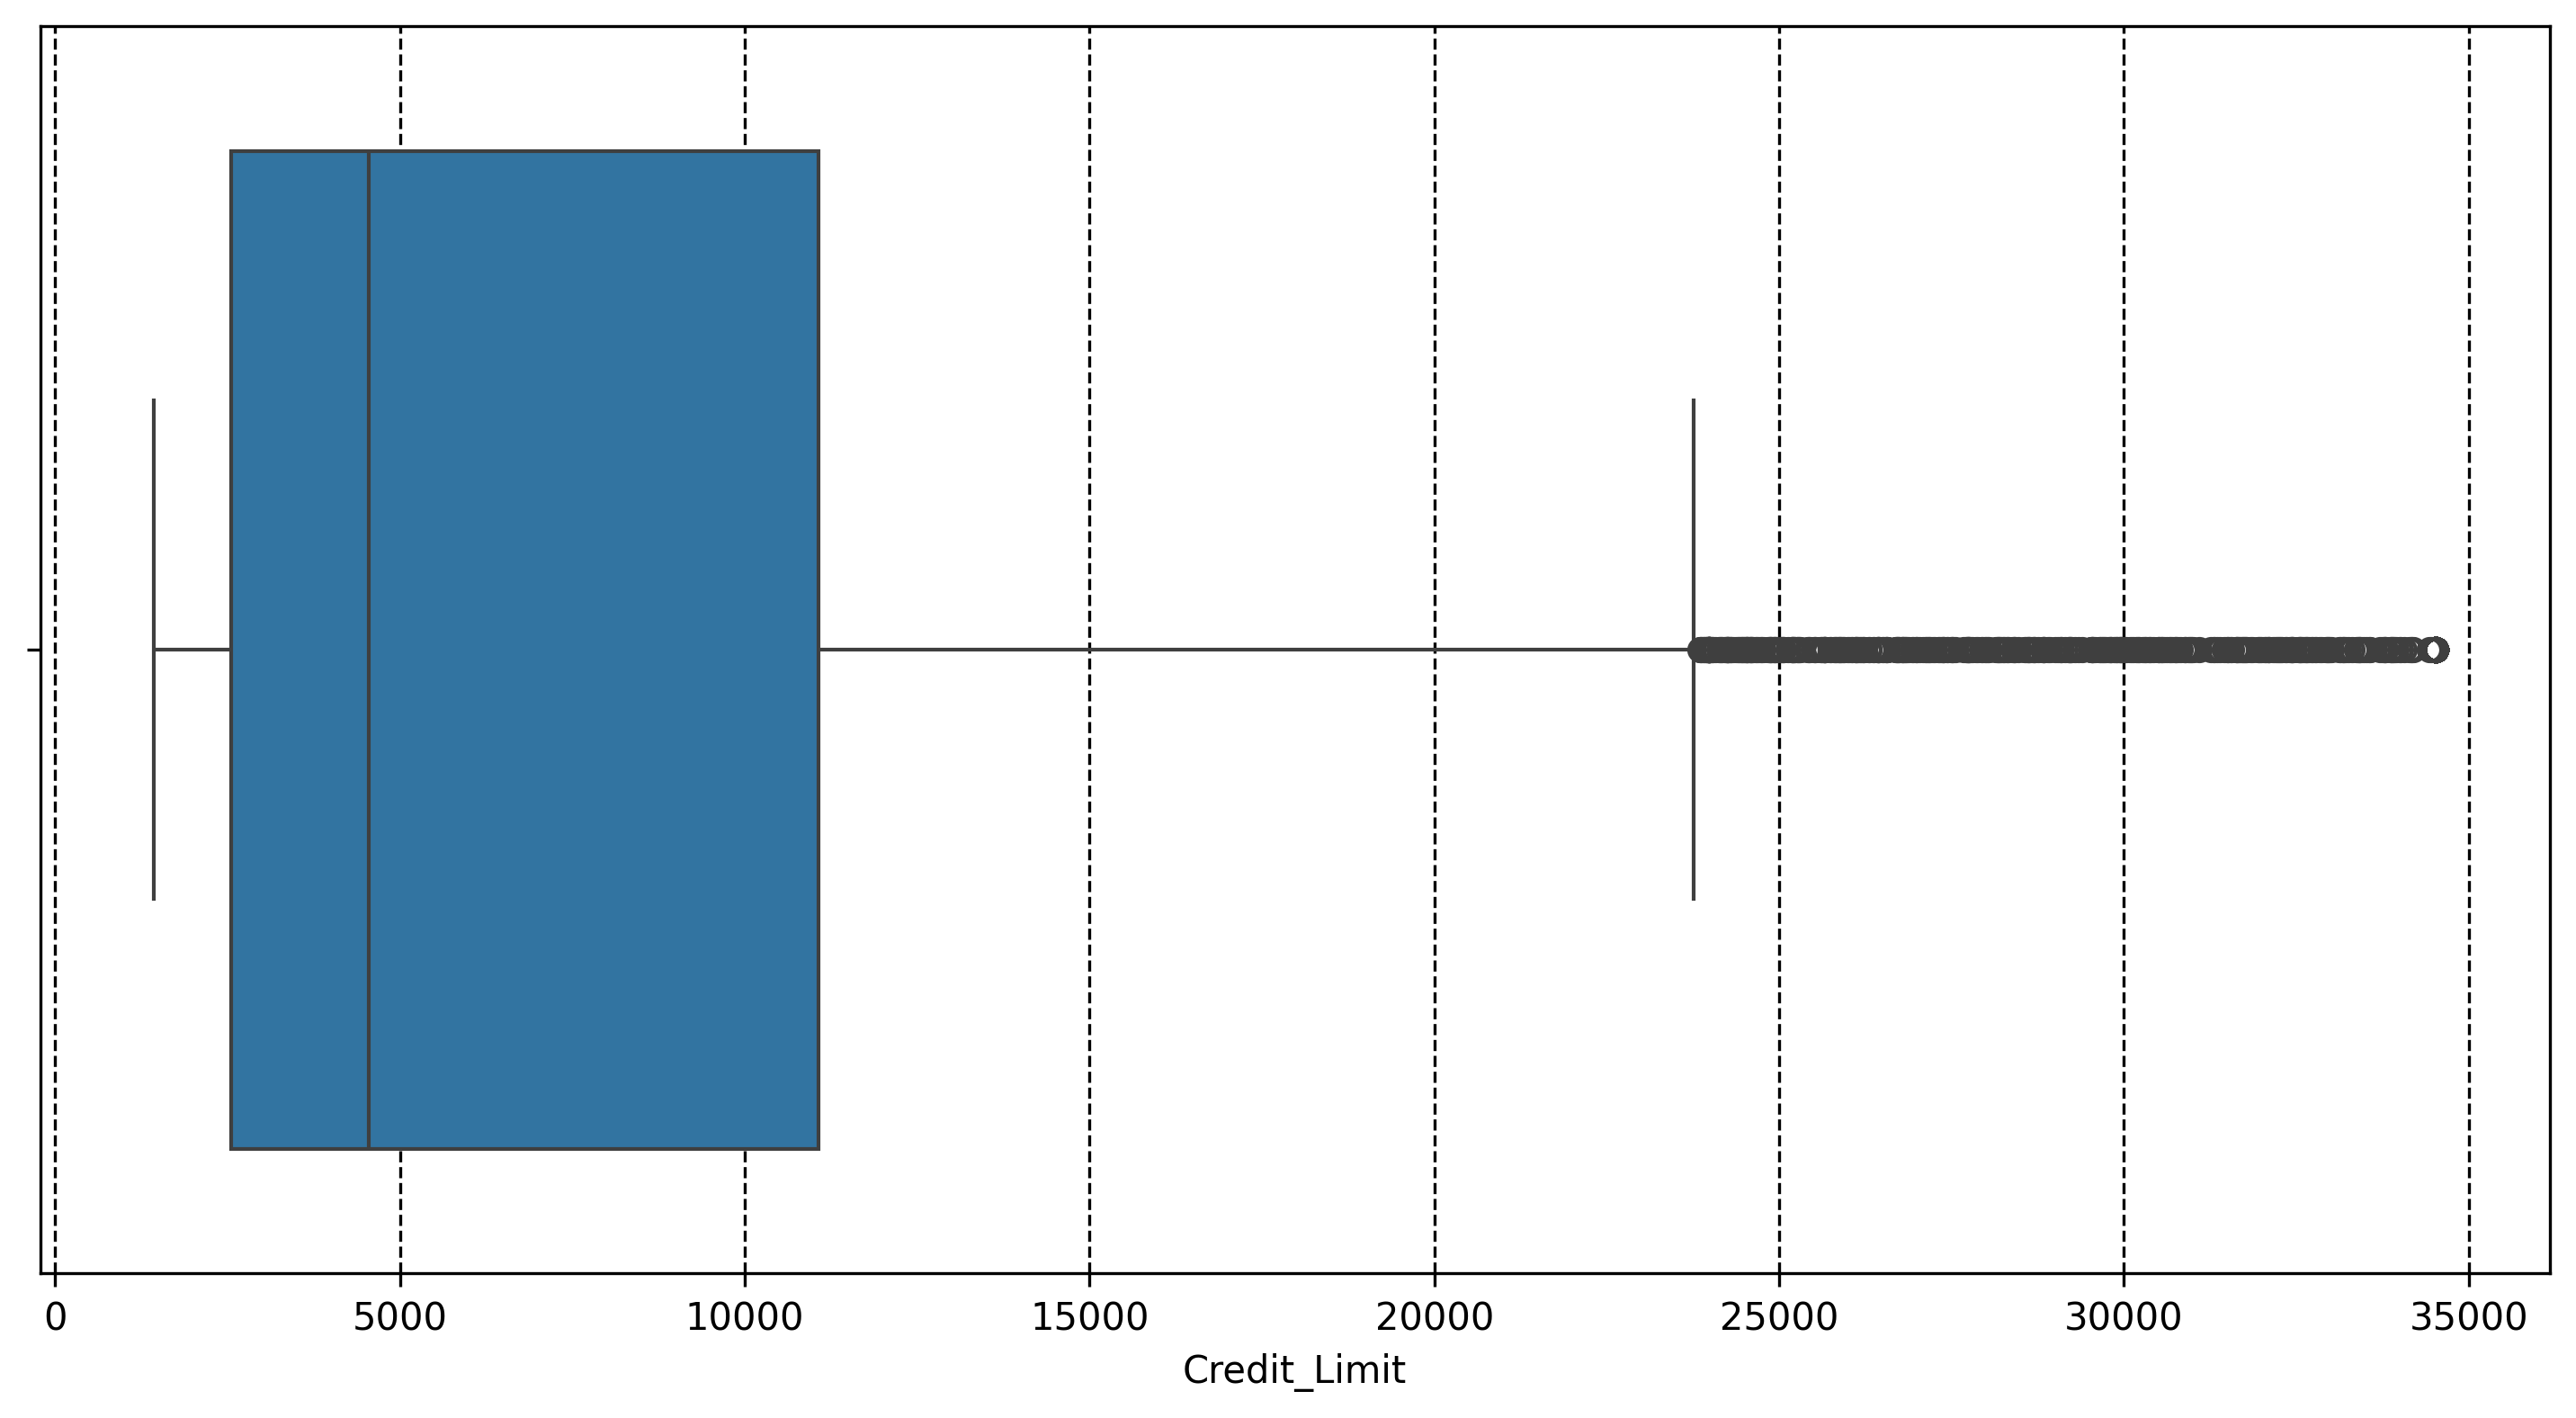

In [19]:
#Check spread of limit and txn value
plt.figure(figsize=(12,6),dpi=300)
plt.grid(axis='both',linestyle='--',color='k')
sns.boxplot(data=df_cc, x='Credit_Limit') 
#mean is higher than median due to large outliers and data is skewed on left Q1 percentile

<Axes: xlabel='Total_Trans_Amt'>

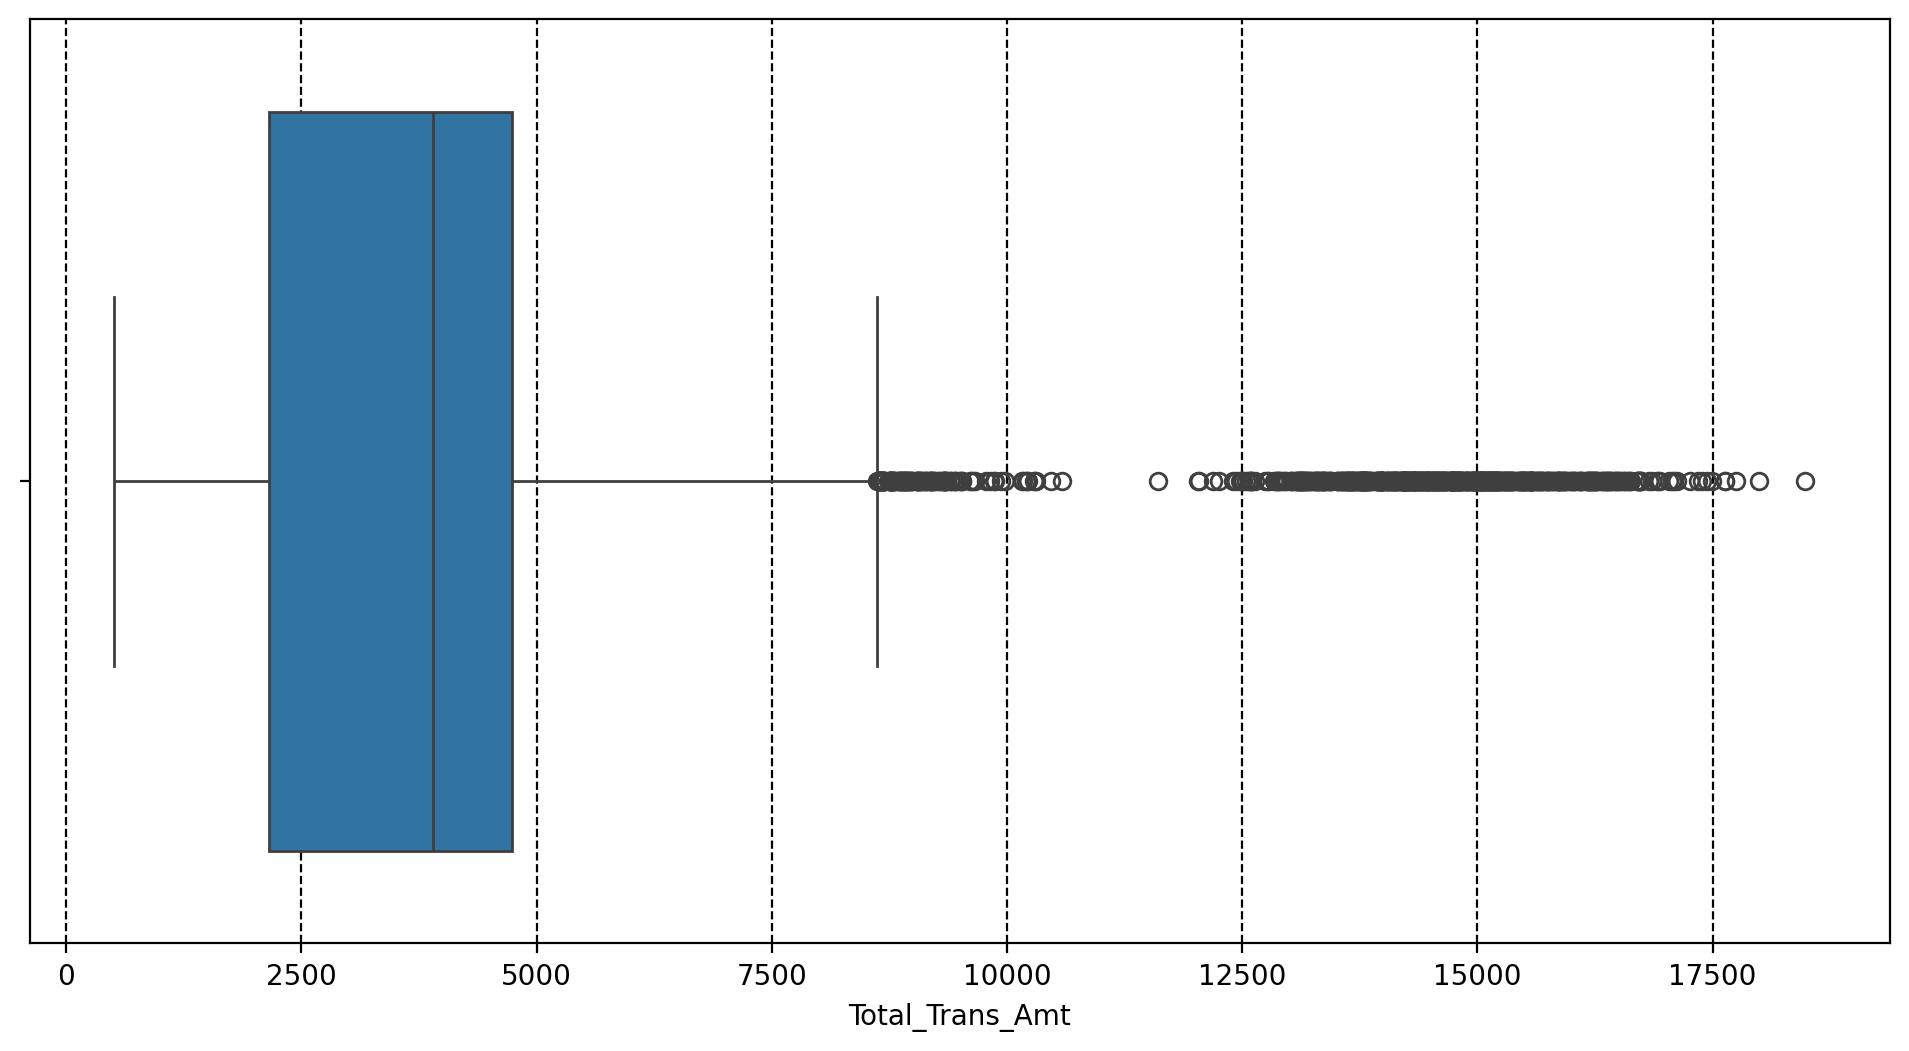

In [20]:
plt.figure(figsize=(12,6),dpi=200)
plt.grid(axis='both',linestyle='--',color='k')
sns.boxplot(data=df_cc, x='Total_Trans_Amt') 
#middle 25-75th percentile is quite constricted, less variability

**Feature Engineering**

In [23]:
#Age Group, Month on Book and Average transaction value per customer
def age_group(x):
    if x>=26 and x<30:
        return '20s'
    elif x>=30 and x<40:
        return '30s'
    elif x>=40 and x<50:
        return '40s'
    elif x>=50 and x<60:
        return '50s'
    else:
        return '60 and Above'

def month_book(y):
    if y<=12:
        return 'LTE 1 yr'
    elif y>12 and y<=24:
        return '1-2 yr'
    elif y>24 and y<=36:
        return '2-3 yr'
    elif y>36 and y<=48:
        return '3-4 yr'
    else:
        return 'GT 4 yr' 

In [25]:
df_cc['Avg_Txn_Value'] = round(df_cc['Total_Trans_Amt']/df_cc['Total_Trans_Ct'],0)  #mean 62 and max 190
df_cc['Age_Group'] = df_cc['Customer_Age'].apply(age_group)
df_cc['MOB_Group'] = df_cc['Months_on_book'].apply(month_book)
df_cc[['Avg_Txn_Value', 'Age_Group', 'MOB_Group']].tail()

,Avg_Txn_Value,Age_Group,MOB_Group
10122,132.0,50s,3-4 yr
10123,127.0,40s,2-3 yr
10124,172.0,40s,2-3 yr
10125,135.0,30s,2-3 yr
10126,169.0,40s,2-3 yr


### #1 Base Churn Rate

In [53]:
df_cc['Attrition_Flag'].value_counts()

Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Text(0.5, 1.0, 'Approx 16.1% churn rate overall')

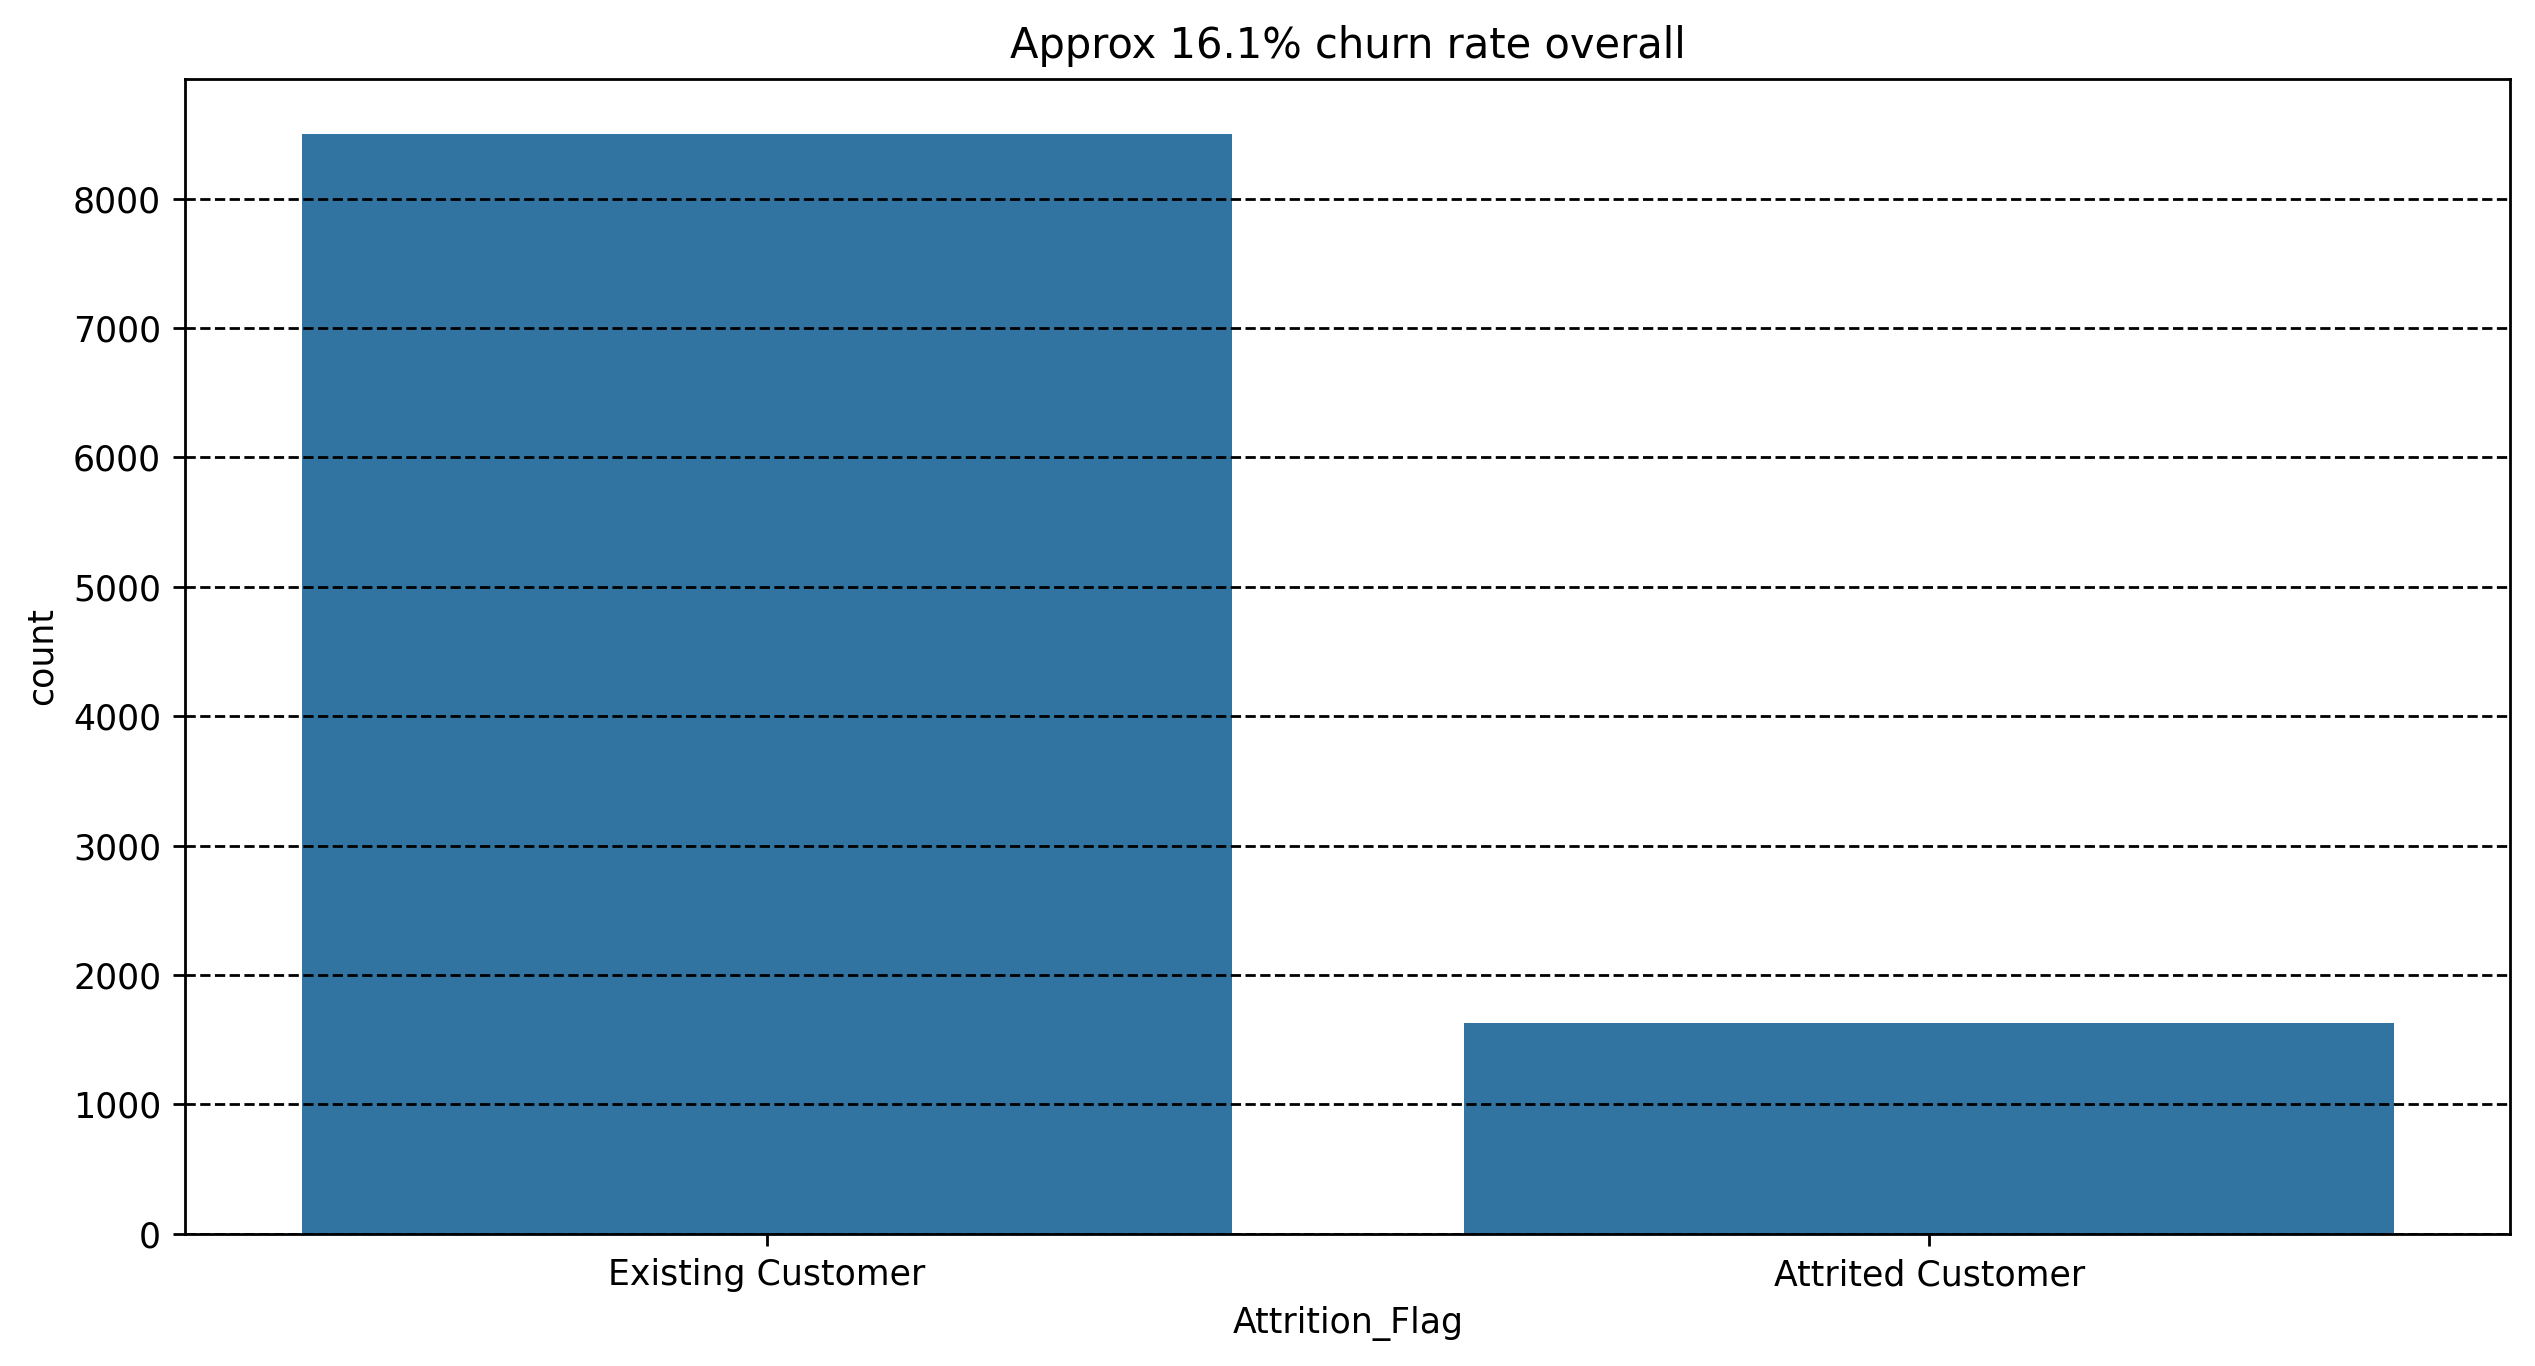

In [54]:
plt.figure(figsize=(12,6), dpi=250)
plt.grid(axis='both', linestyle='--', color='k')
sns.countplot(data=df_cc, x='Attrition_Flag')
plt.title('Approx 16.1% churn rate overall')

Text(0.5, 1.0, '37% of total churn in Less than 40k income category')

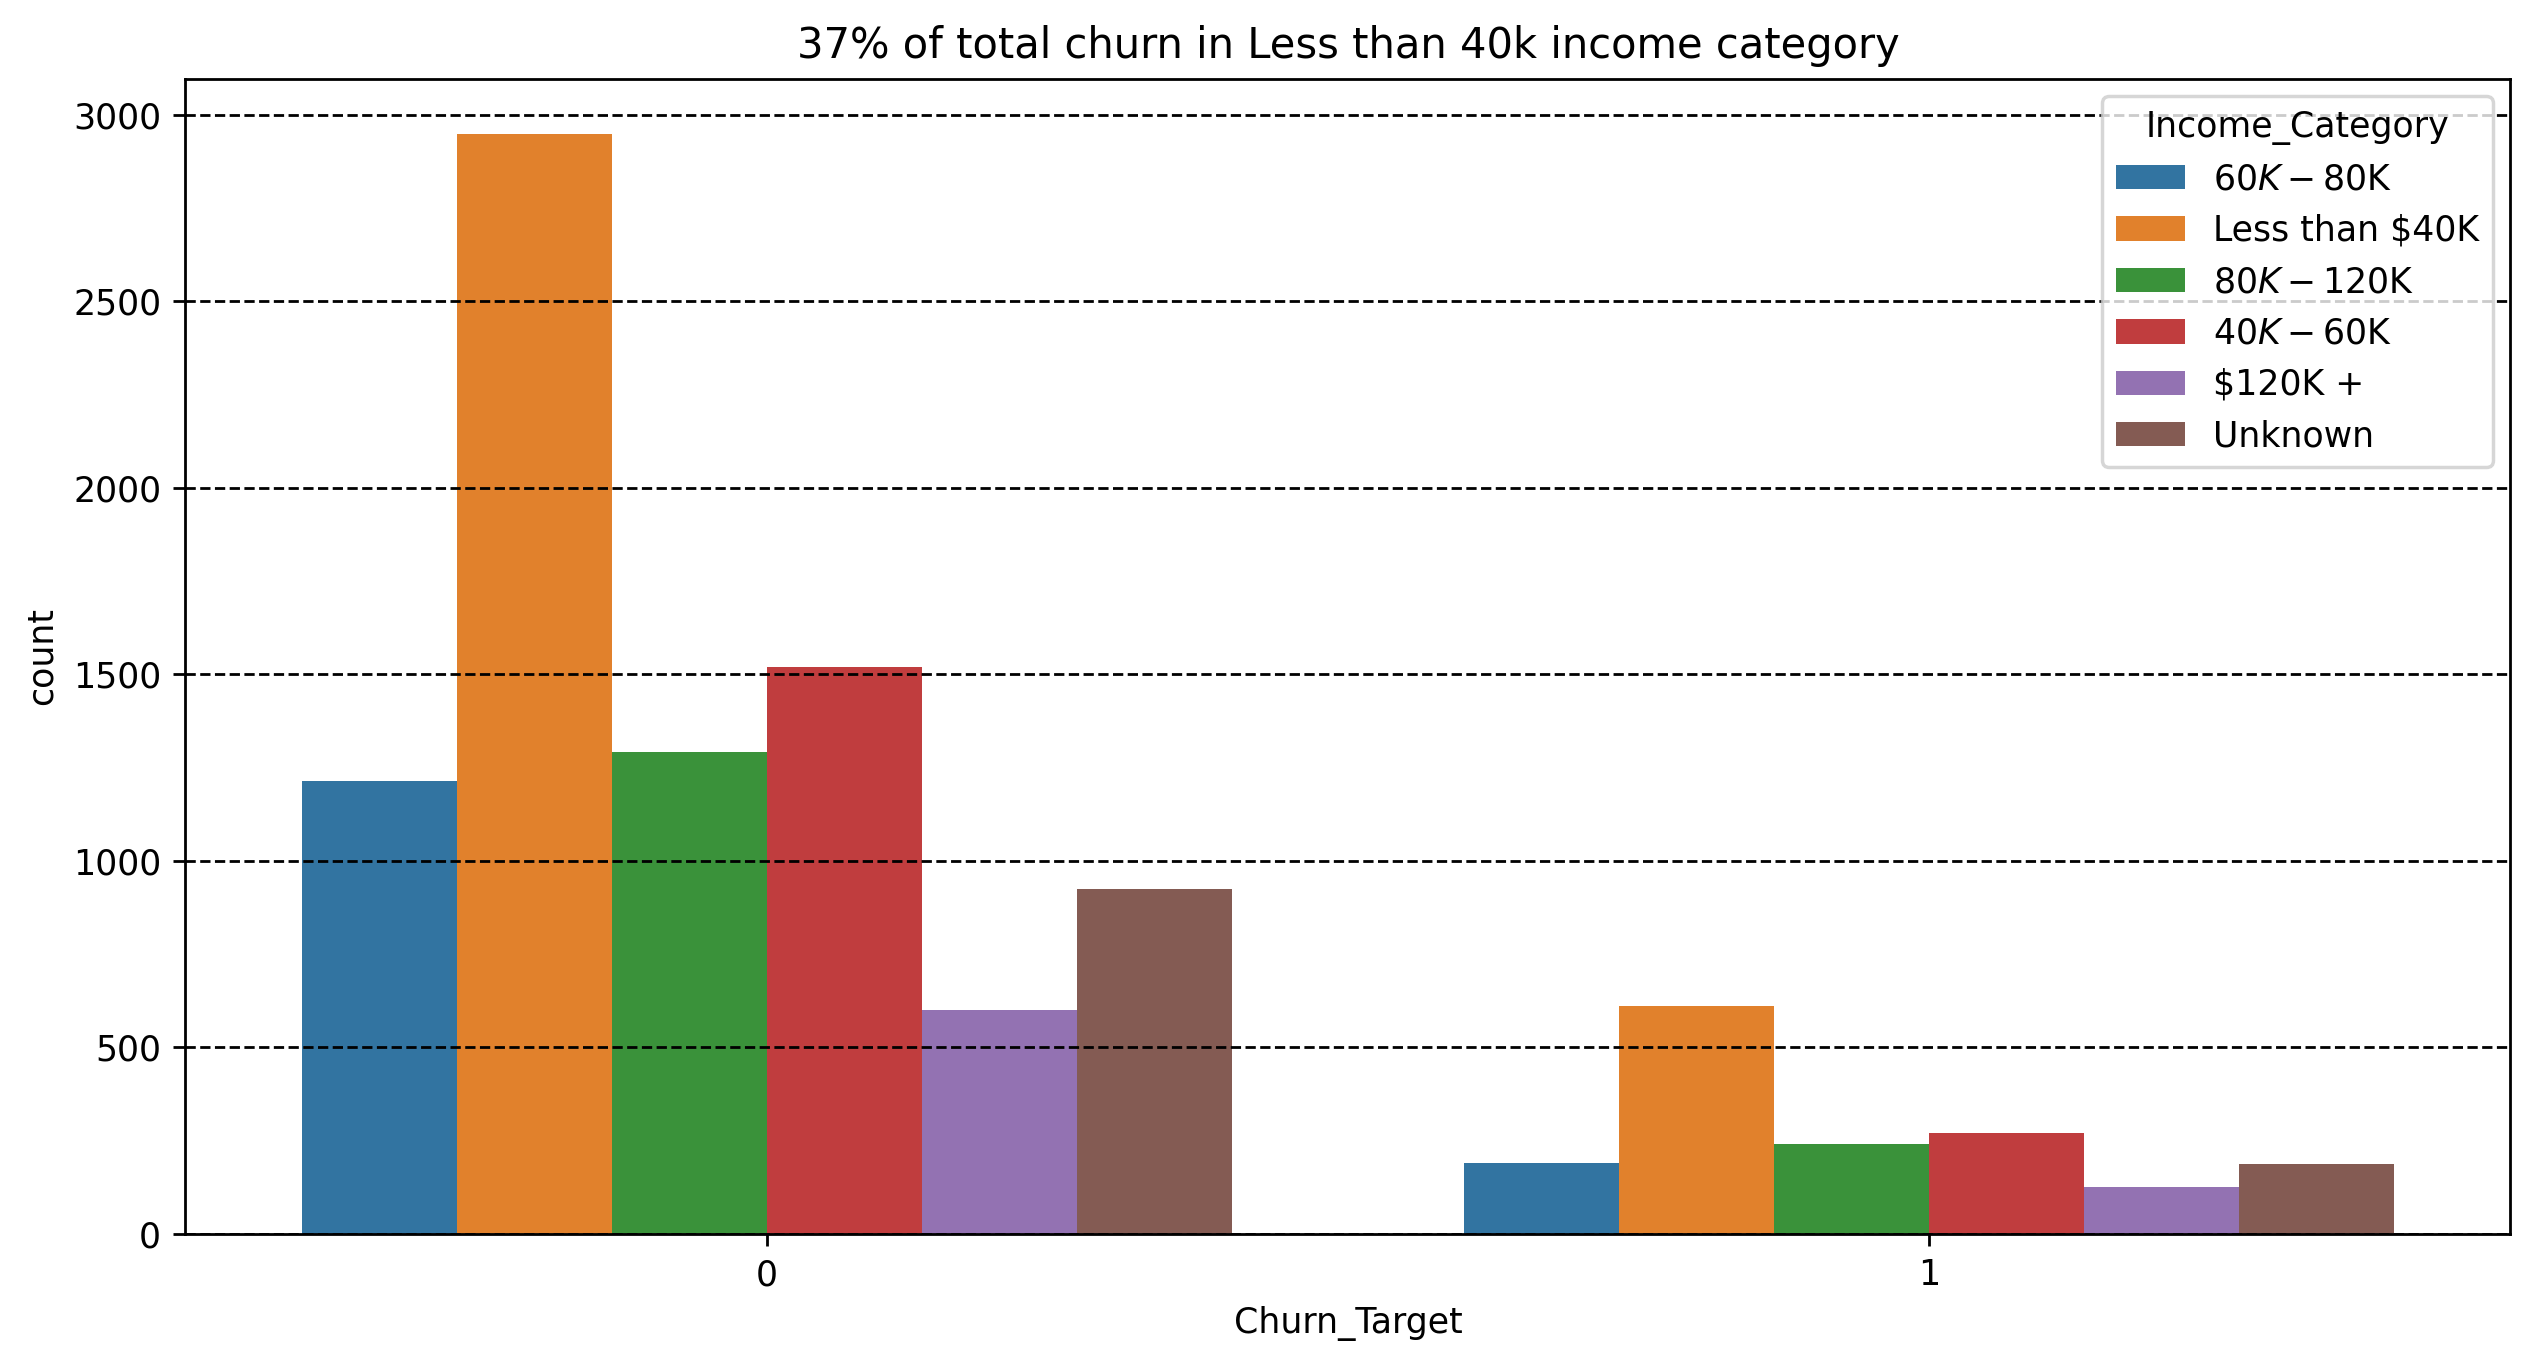

In [42]:
plt.figure(figsize=(12,6), dpi=250)
plt.grid(axis='both', linestyle='--', color='k')
sns.countplot(data=df_cc, x='Churn_Target', hue='Income_Category')
plt.title('37% of total churn in Less than 40k income category')

Text(0.5, 1.0, 'Nearly 30% of total churn of Graduate customers. Requiring broad strategies for retention')

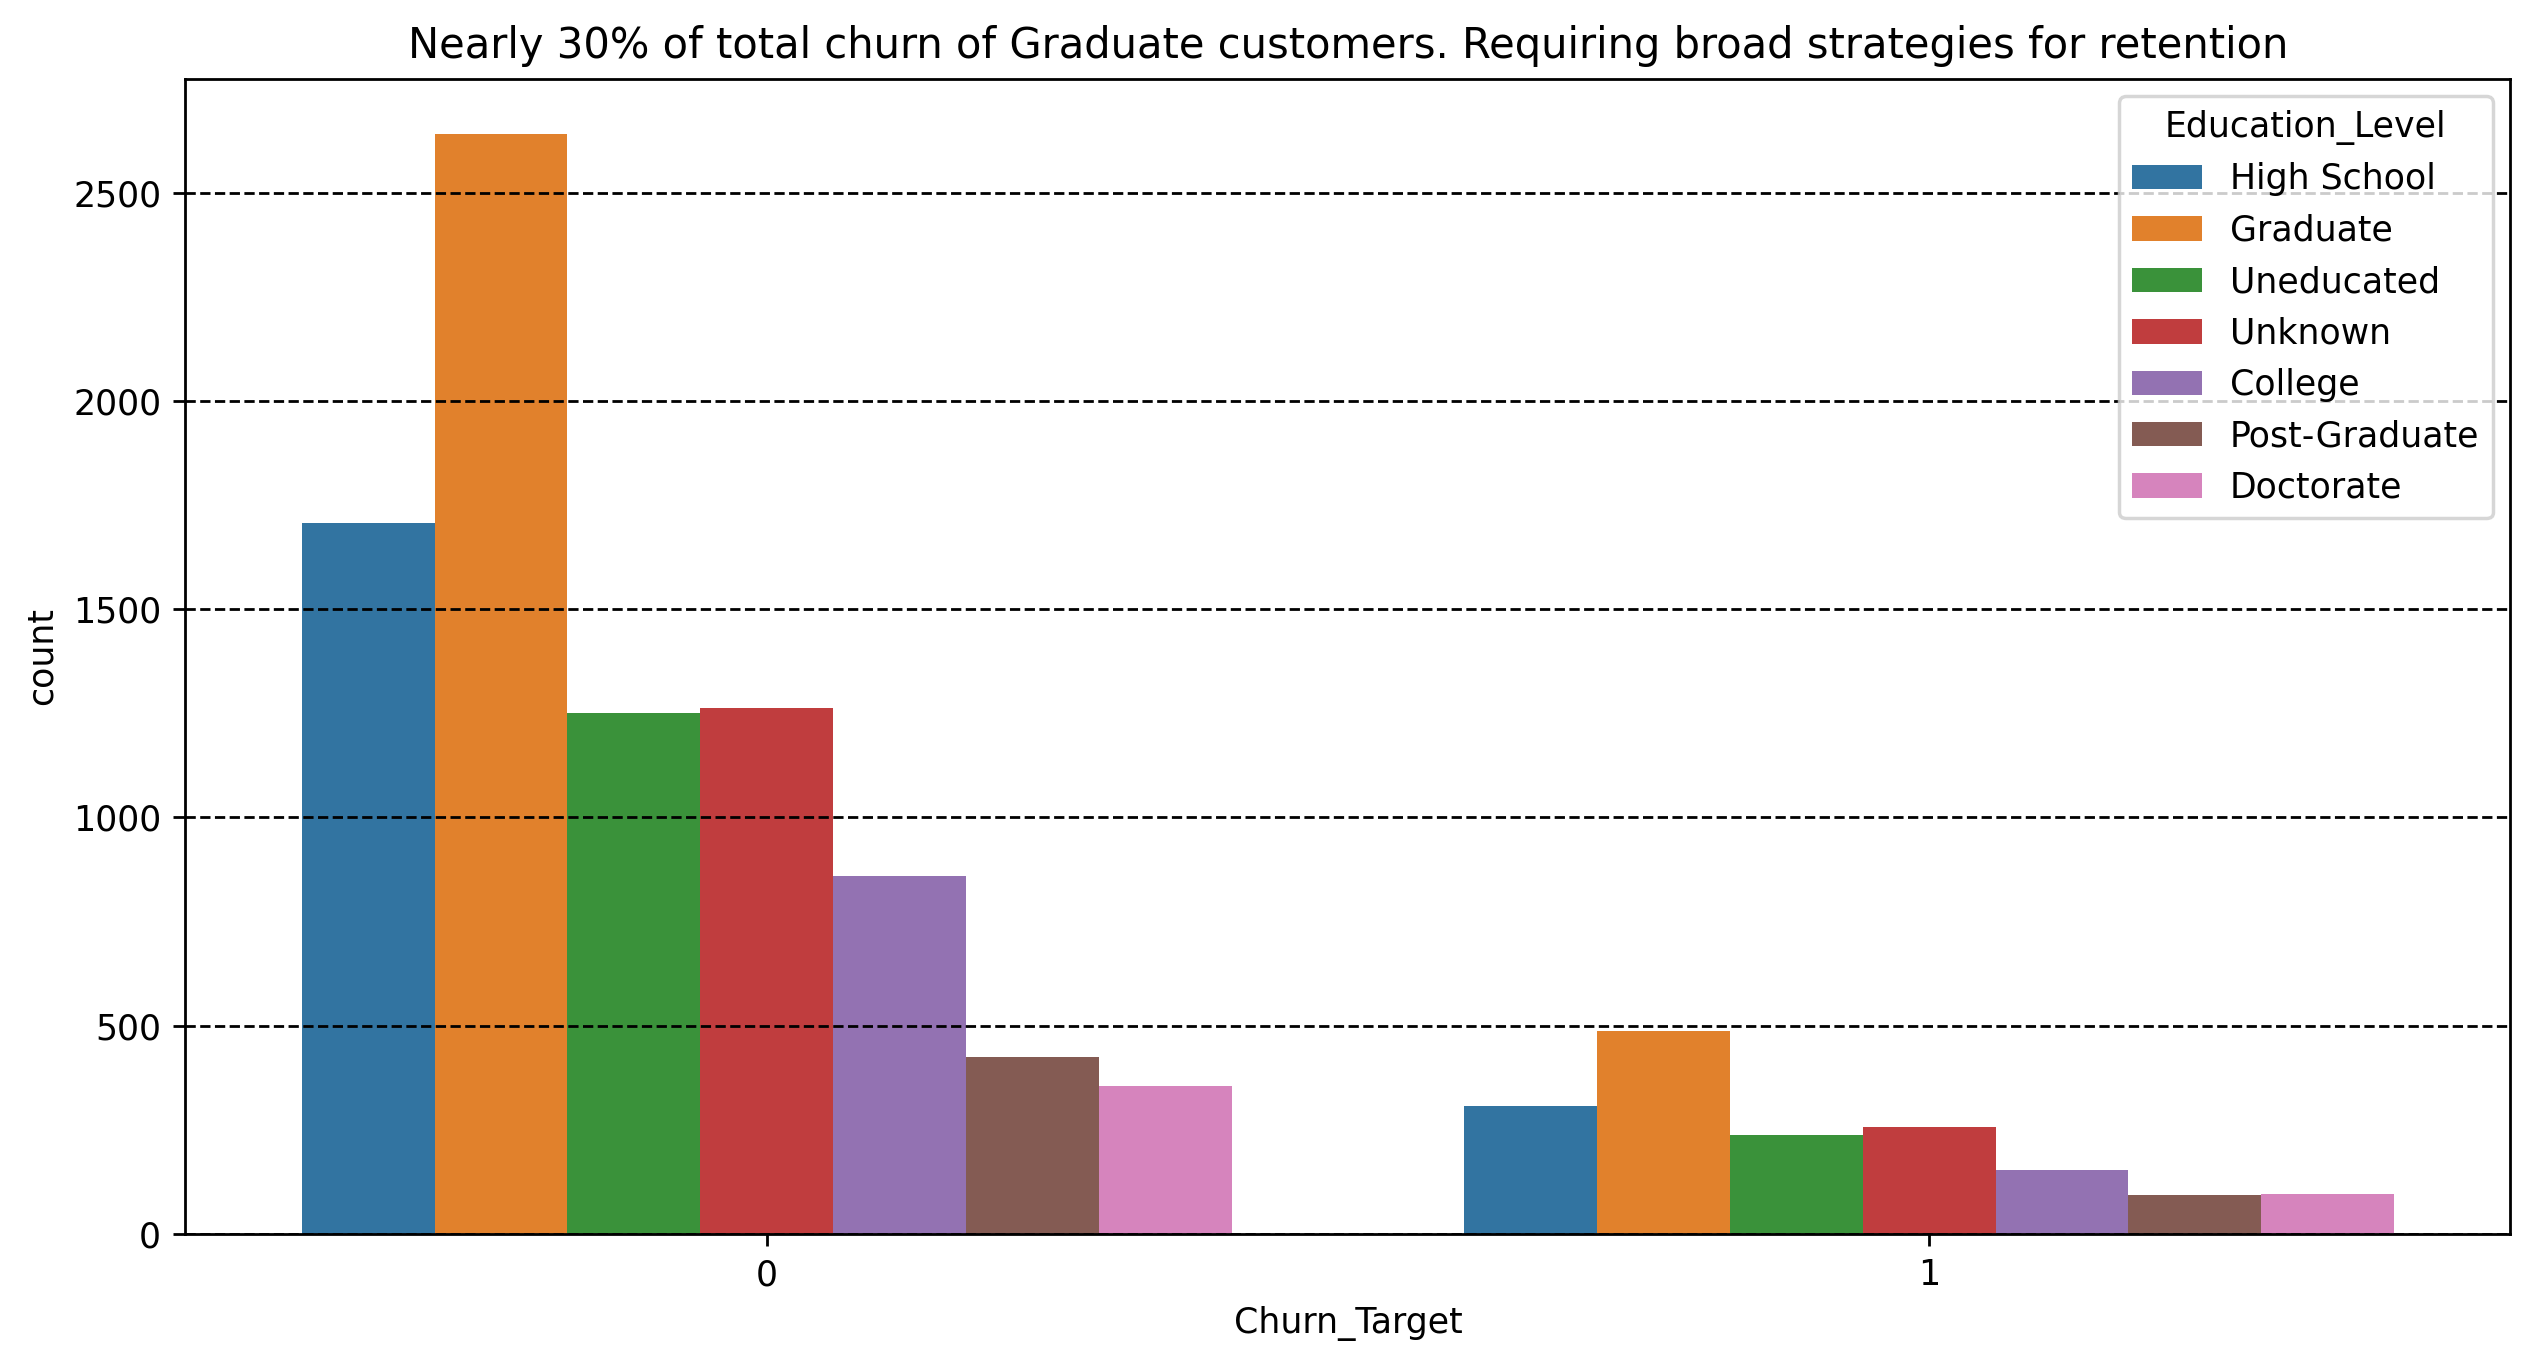

In [43]:
plt.figure(figsize=(12,6), dpi=250)
plt.grid(axis='both', linestyle='--', color='k')
sns.countplot(data=df_cc, x='Churn_Target', hue='Education_Level')
plt.title('Nearly 30% of total churn of Graduate customers. Requiring broad strategies for retention')

### #2 Churn by Demographics

Text(0.5, 1.0, 'About 76% of total churn in above 40 years age group. Need to understand preferences and lifestyle choices')

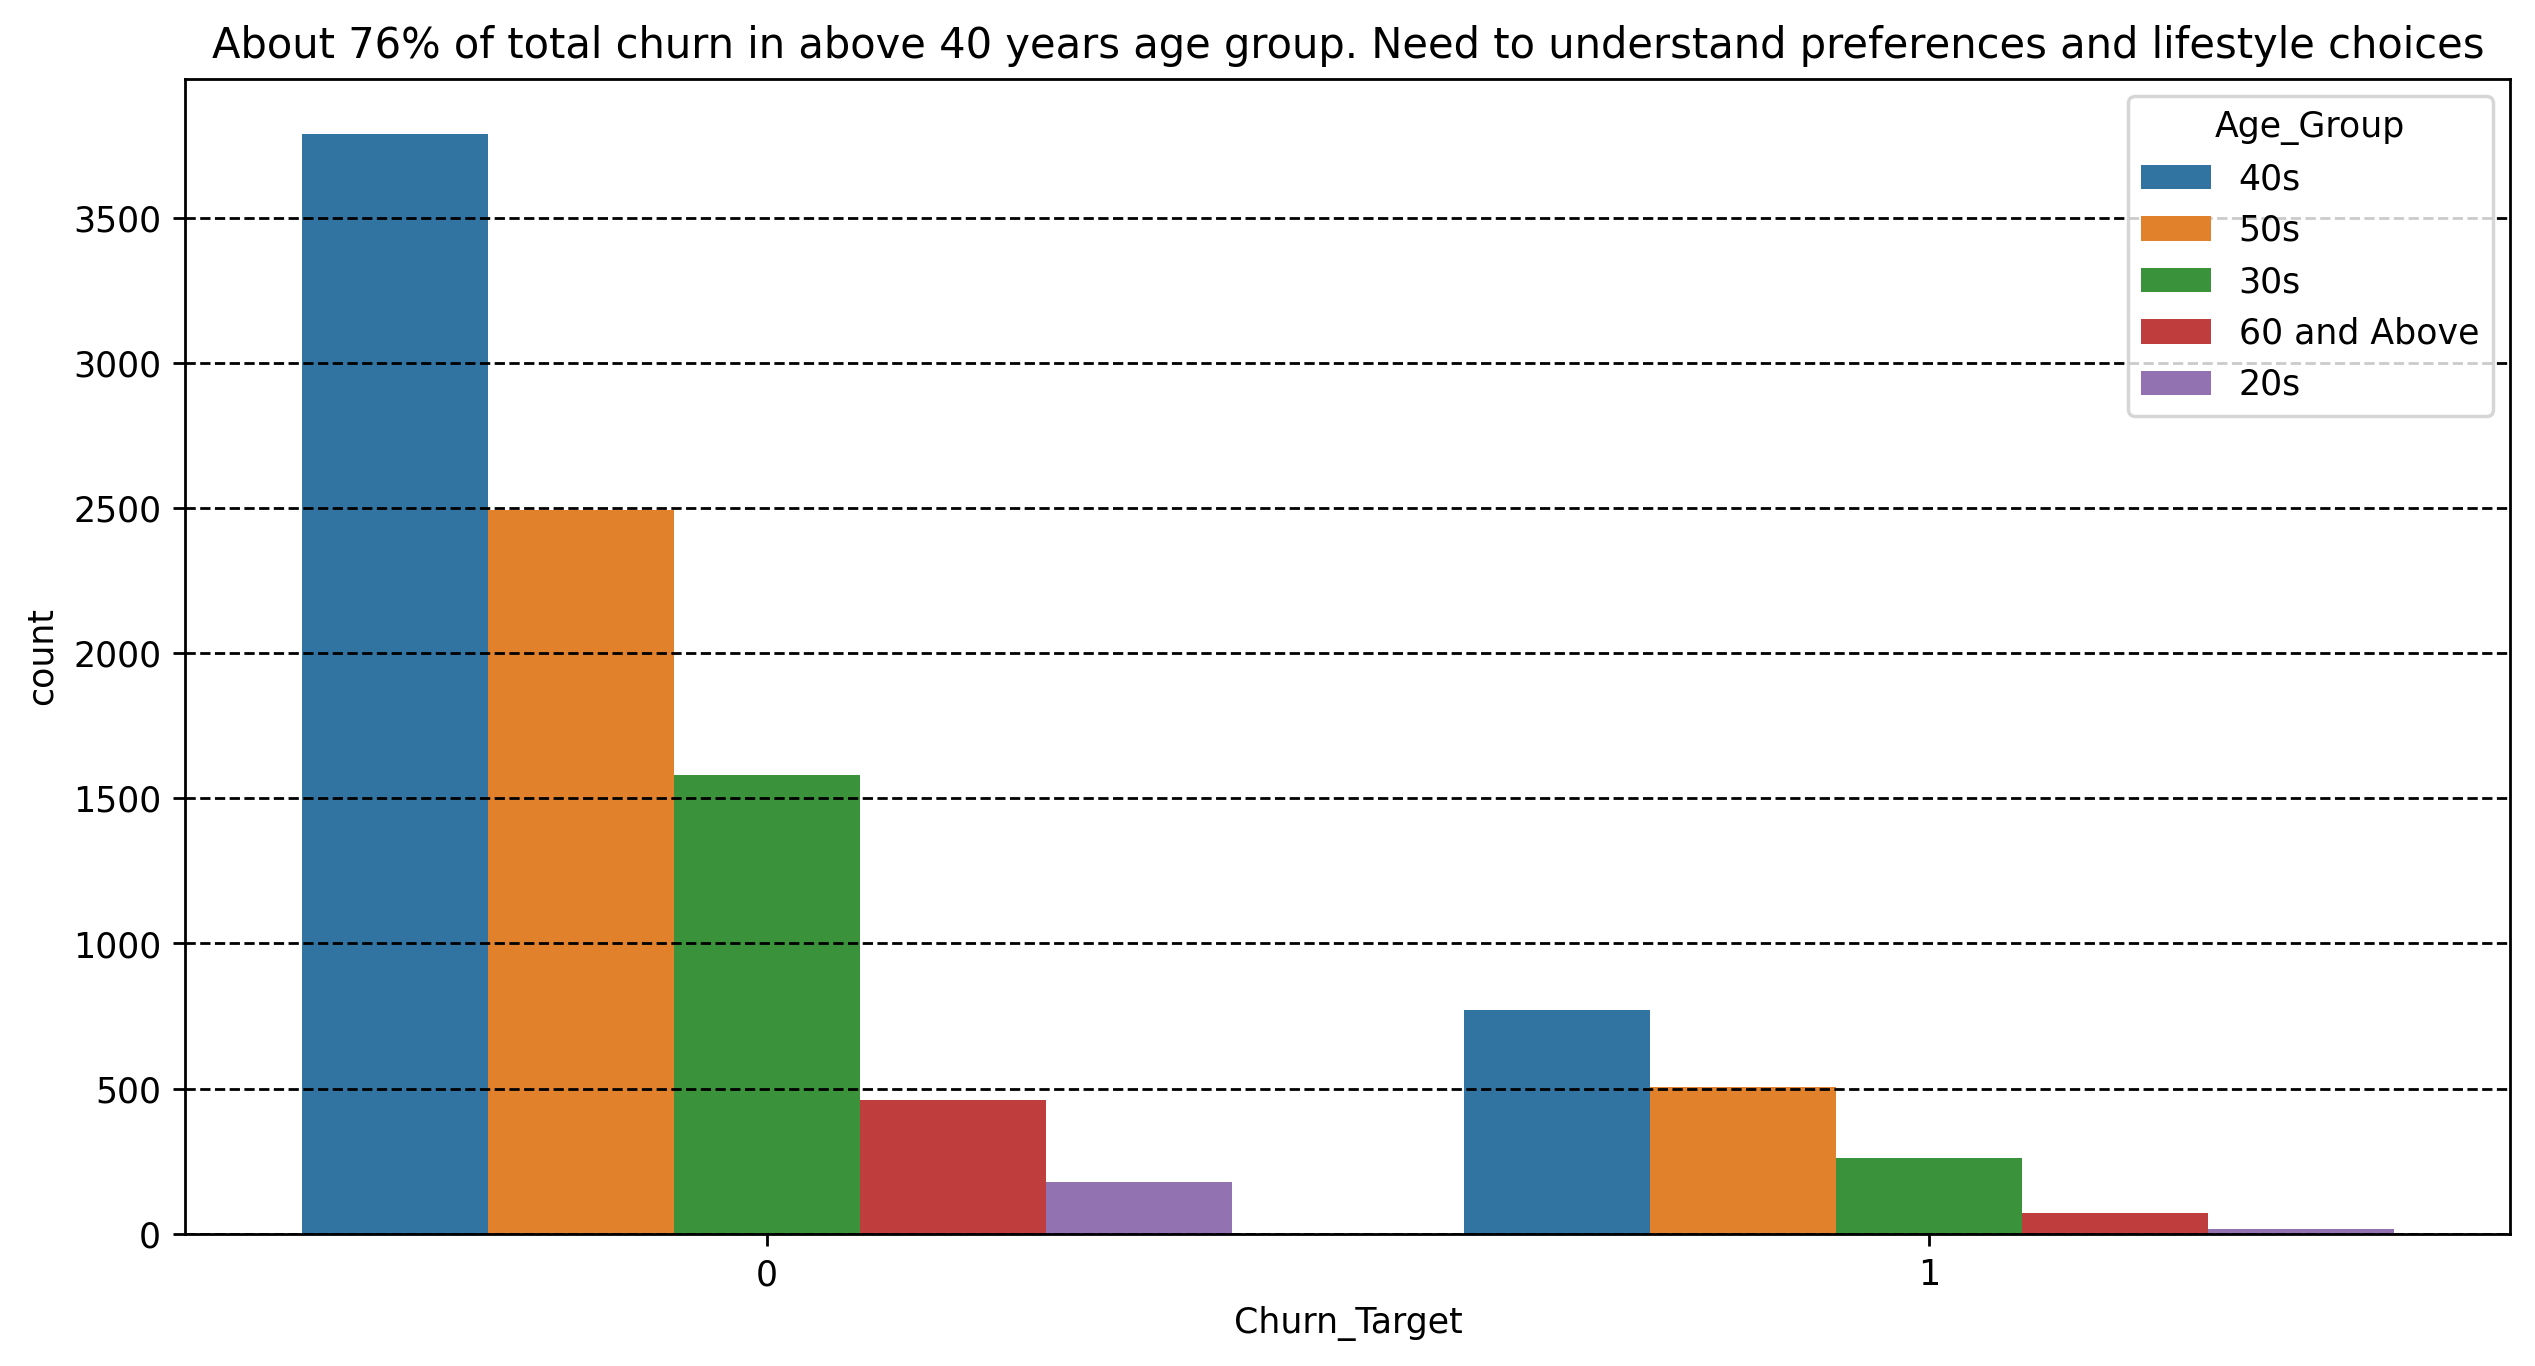

In [44]:
plt.figure(figsize=(12,6), dpi=250)
plt.grid(axis='both', linestyle='--', color='k')
sns.countplot(data=df_cc, x='Churn_Target', hue='Age_Group')
plt.title('About 76% of total churn in above 40 years age group. Need to understand preferences and lifestyle choices')

Text(0.5, 1.0, 'Females have 35% higher churn rate than men. Need to investigate product features to make it appealing')

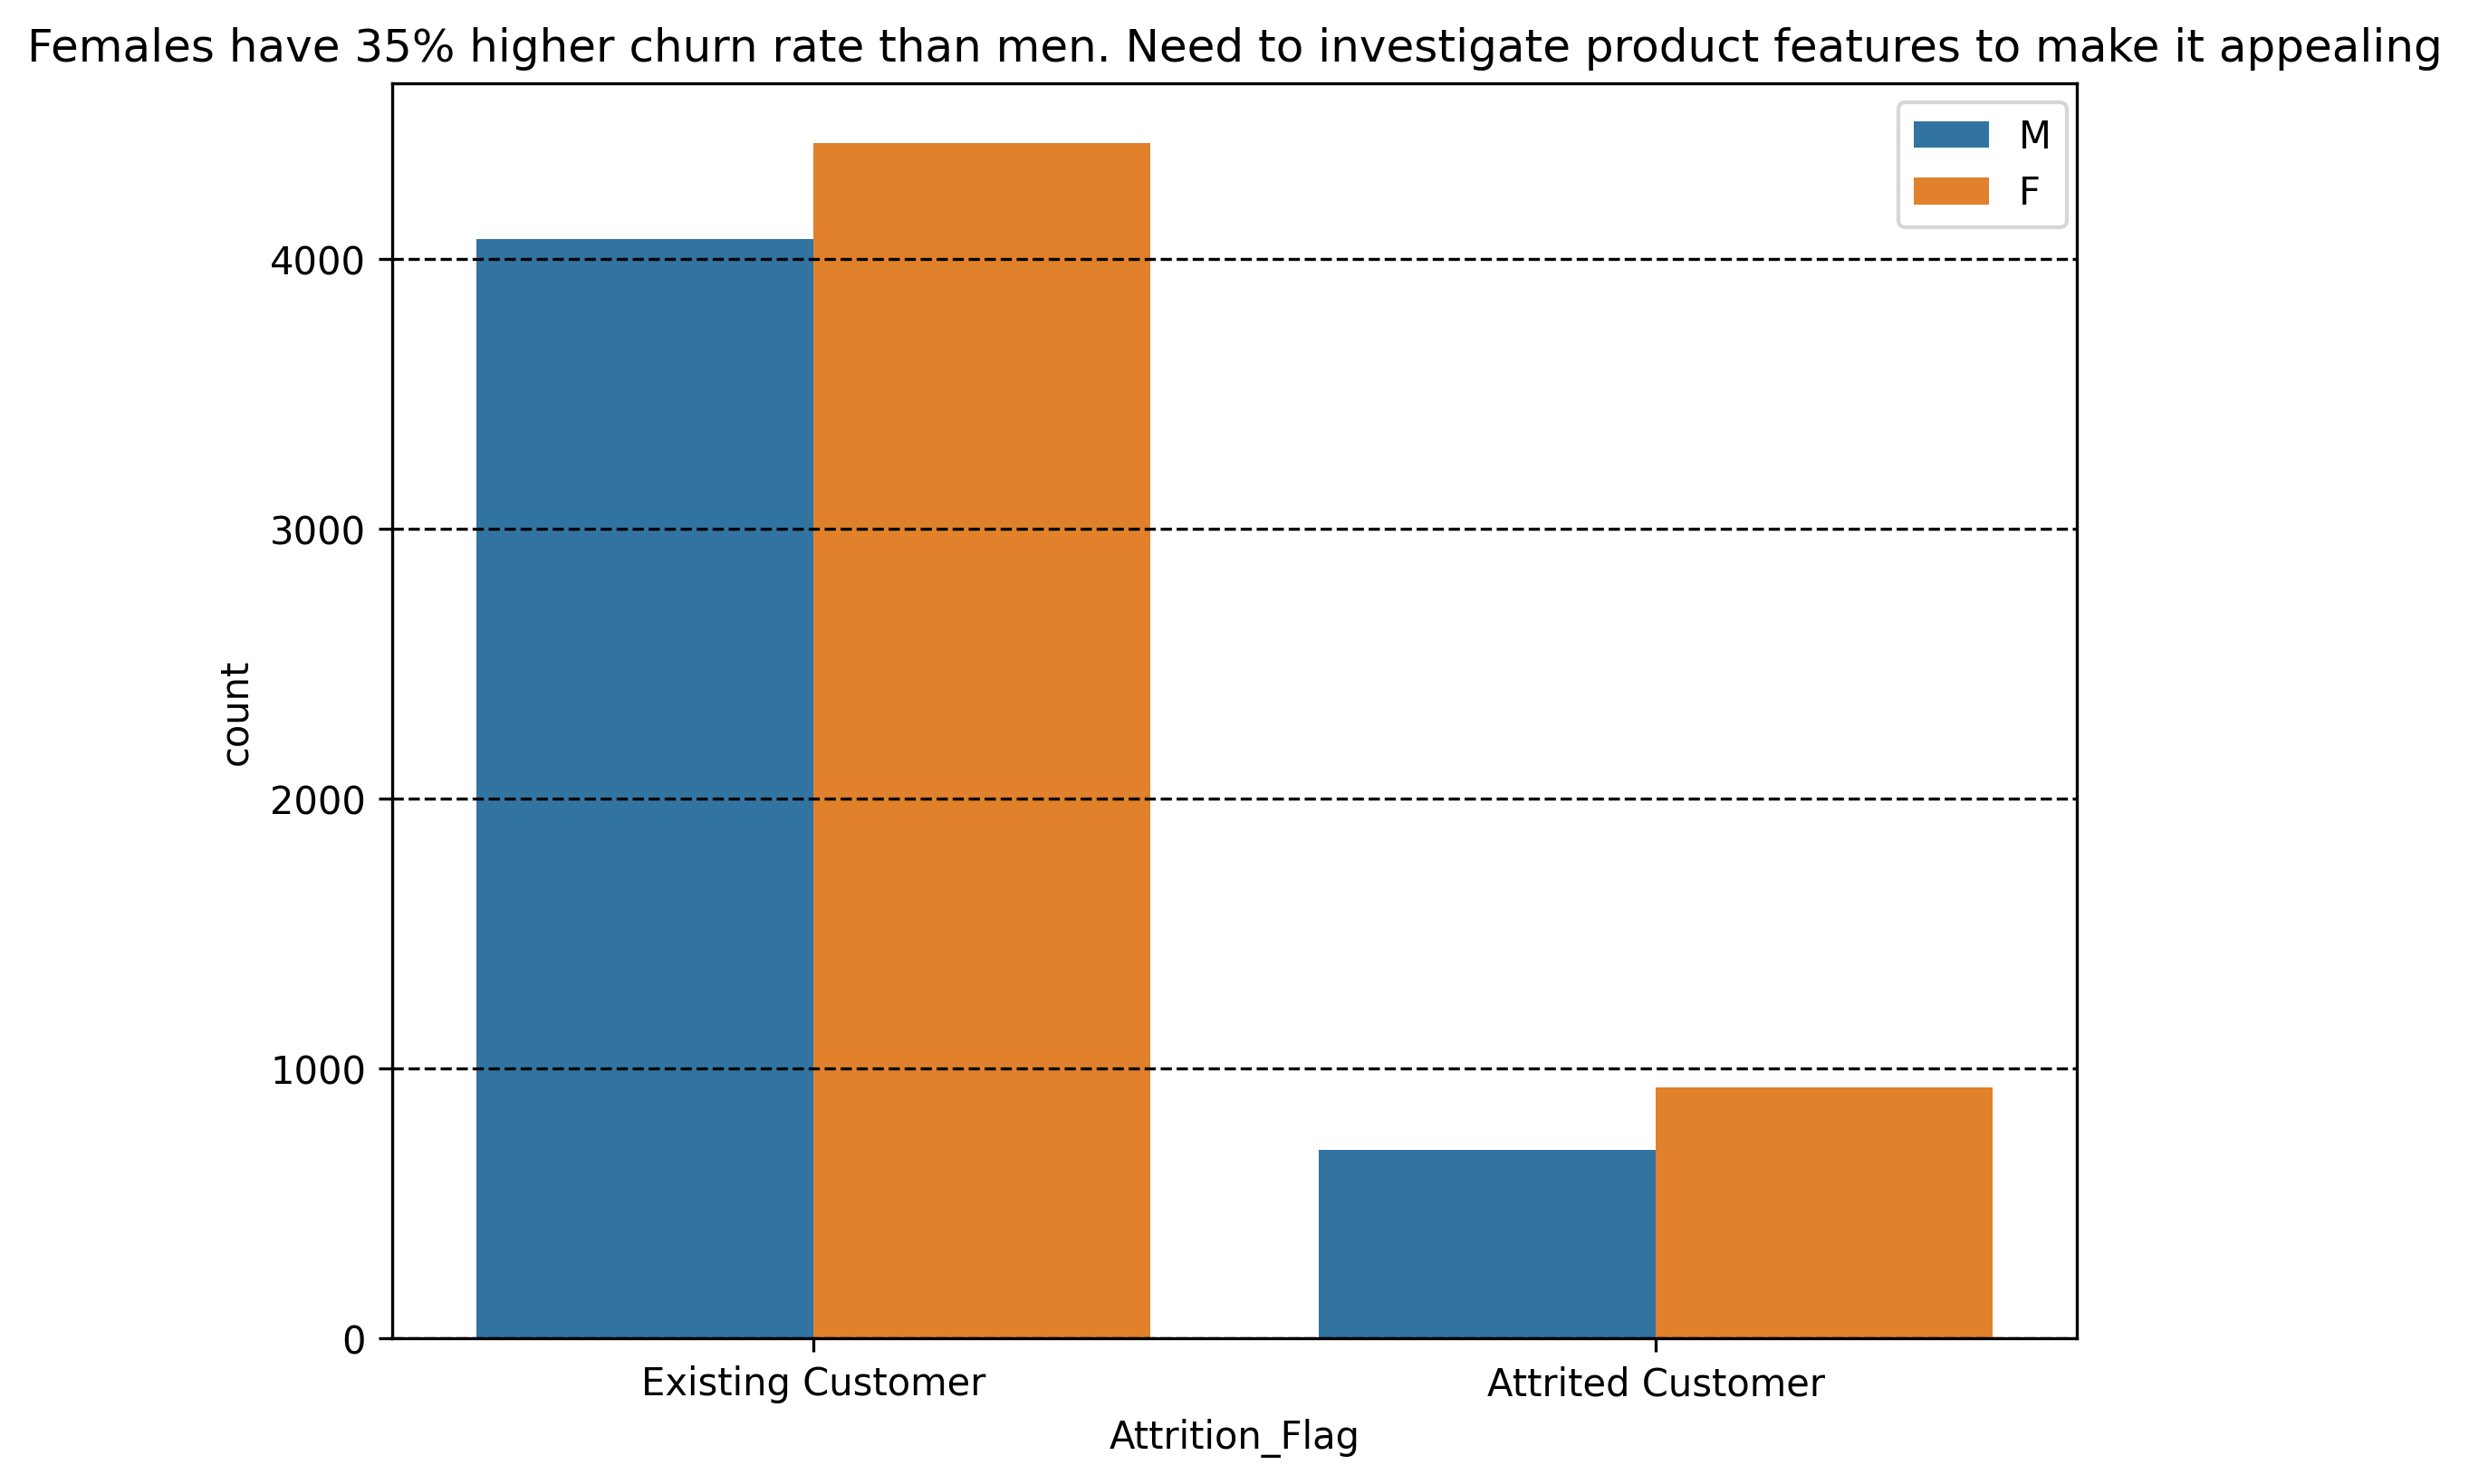

In [56]:
plt.figure(figsize=(8,6),dpi=300)
plt.grid(axis='both',linestyle='--',color='k')
sns.countplot(data=df_cc, x='Attrition_Flag', hue='Gender')
plt.legend(bbox_to_anchor=(1.005,1)) #loc of legend 
plt.title('Females have 35% higher churn rate than men. Need to investigate product features to make it appealing')

### #3 Socio Economic Factors

Text(0.5, 1.0, 'Females have 35% higher churn rate than men. Need to investigate product features to make it appealing')

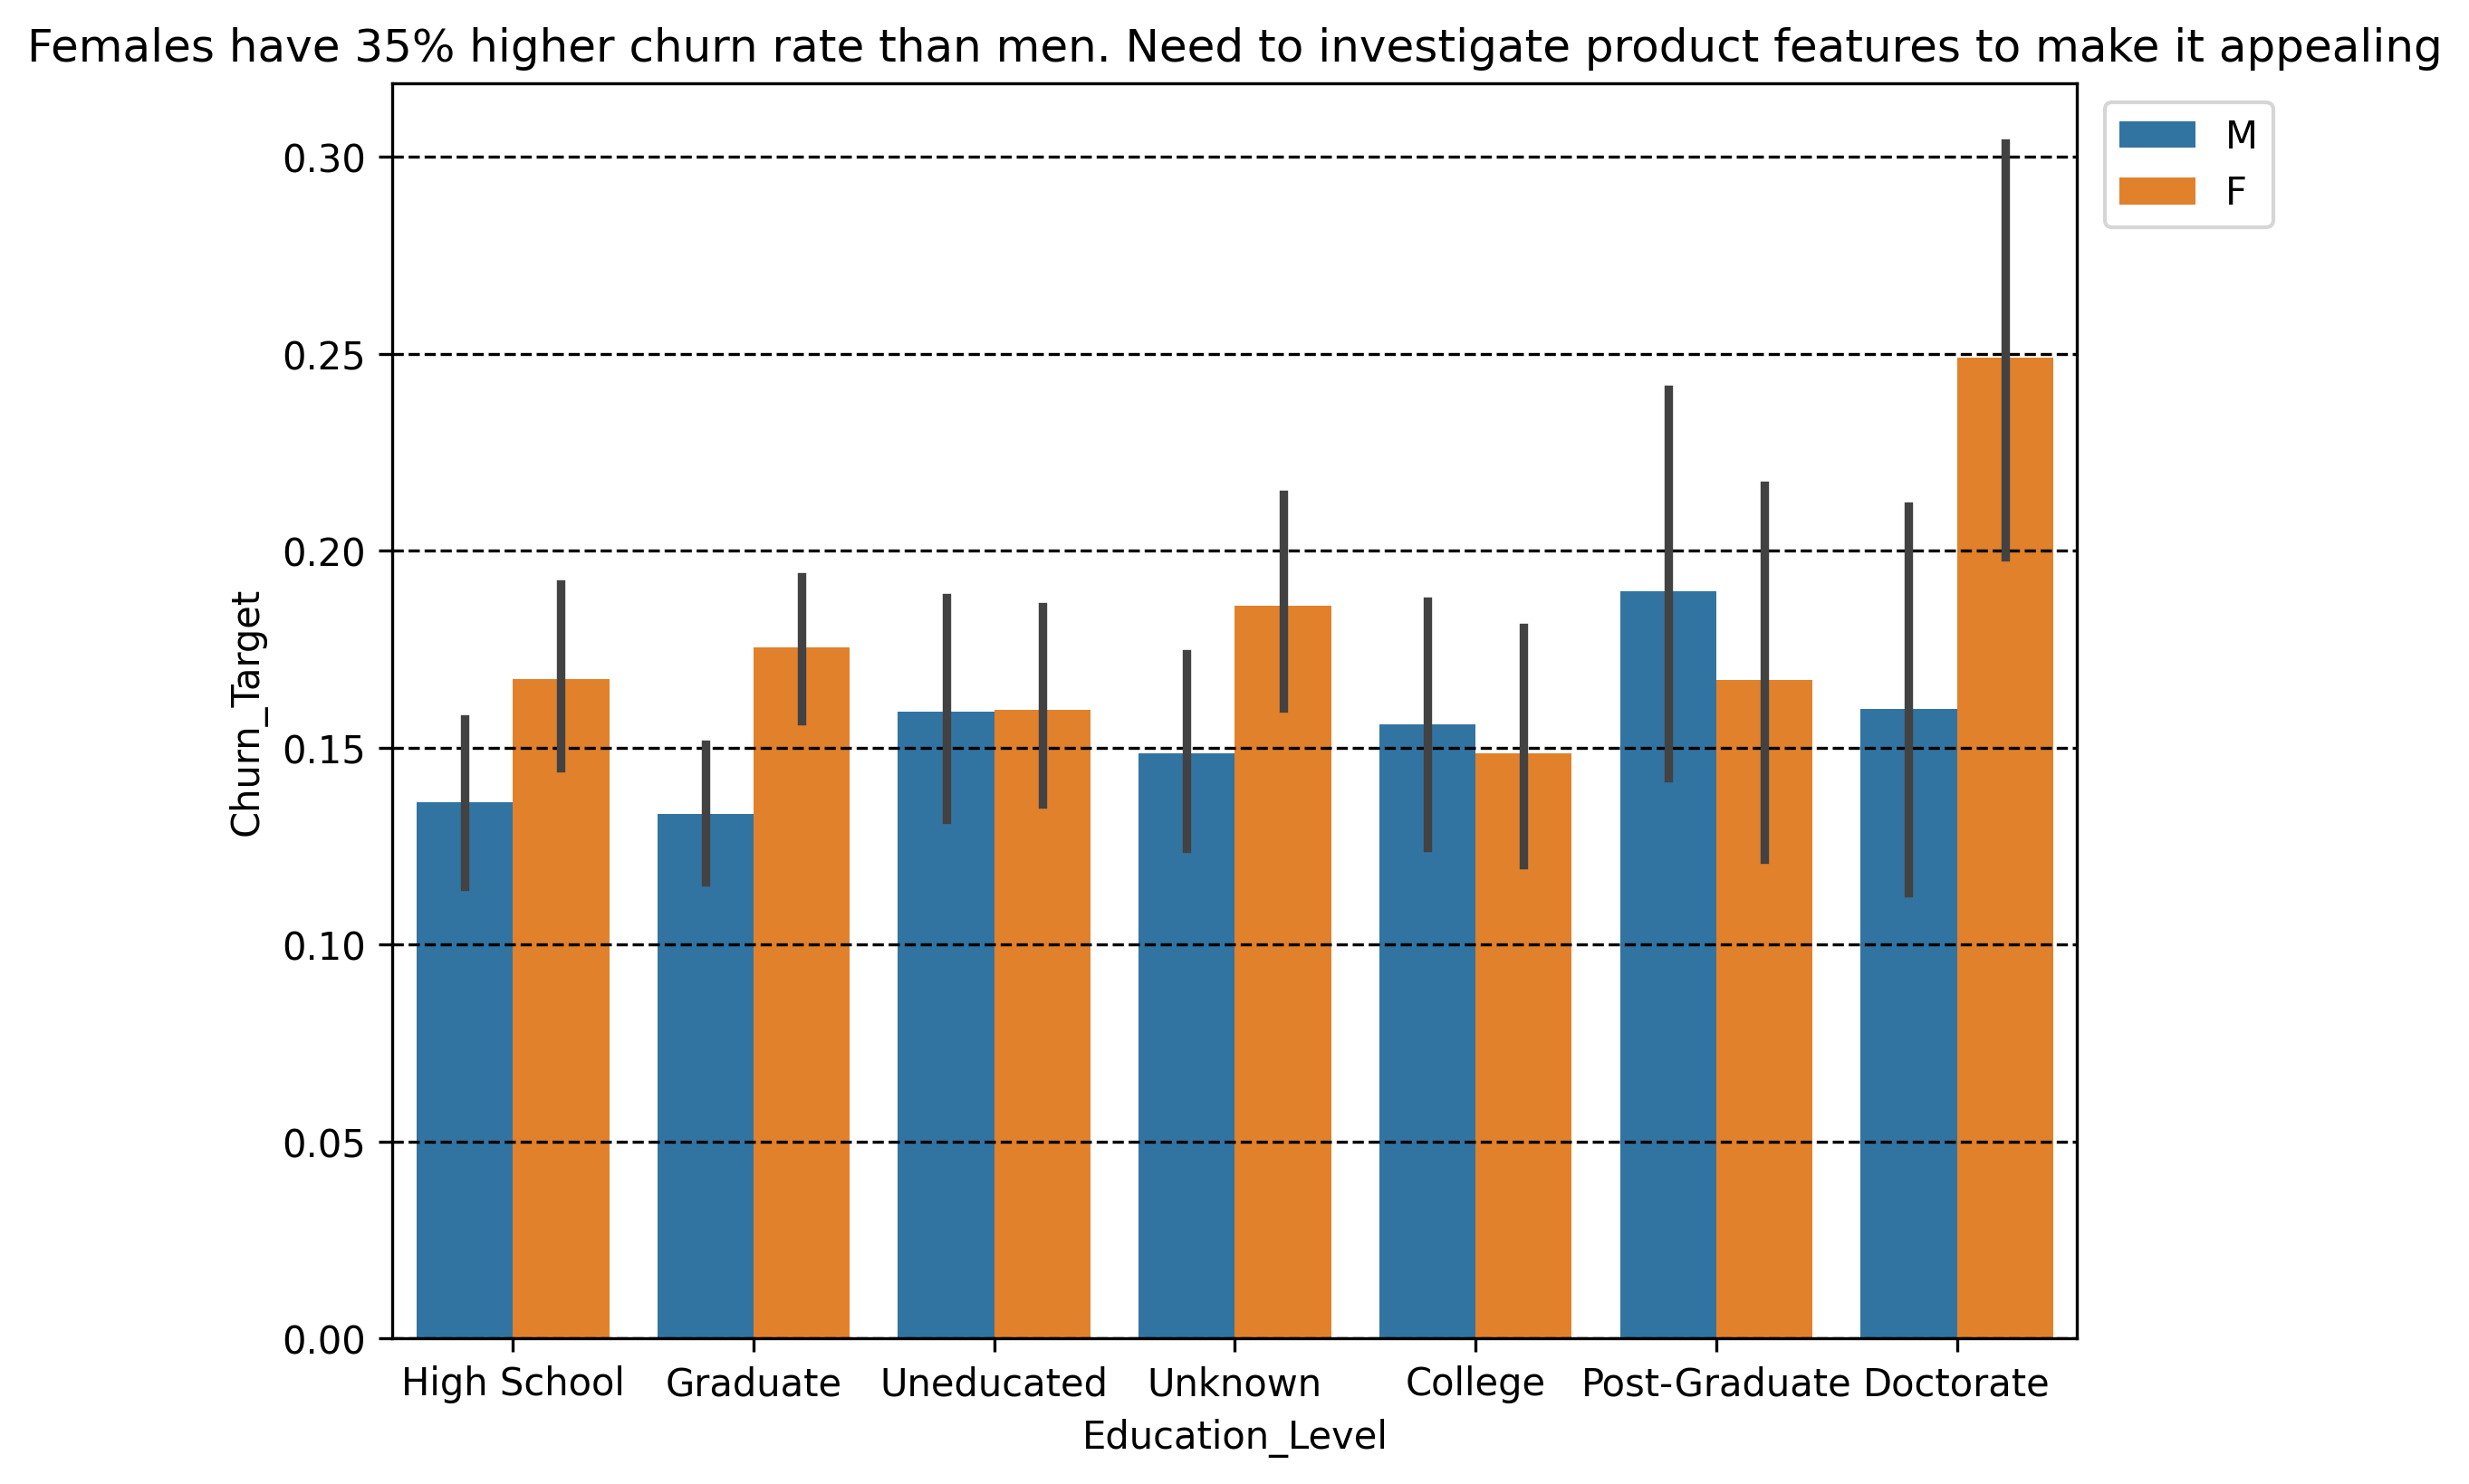

In [60]:
plt.figure(figsize=(8,6),dpi=300)
plt.grid(axis='both',linestyle='--',color='k')
sns.barplot(data=df_cc, x='Education_Level', y='Churn_Target',
            estimator=np.mean, hue='Gender')
plt.legend(bbox_to_anchor=(1.005,1))
plt.title('Females have 35% higher churn rate than men. Need to investigate product features to make it appealing')

Text(0.5, 1.0, "Nearly 91% churn rate is from basic Blue type credit card. It's time to evaluate features and benefits offered.")

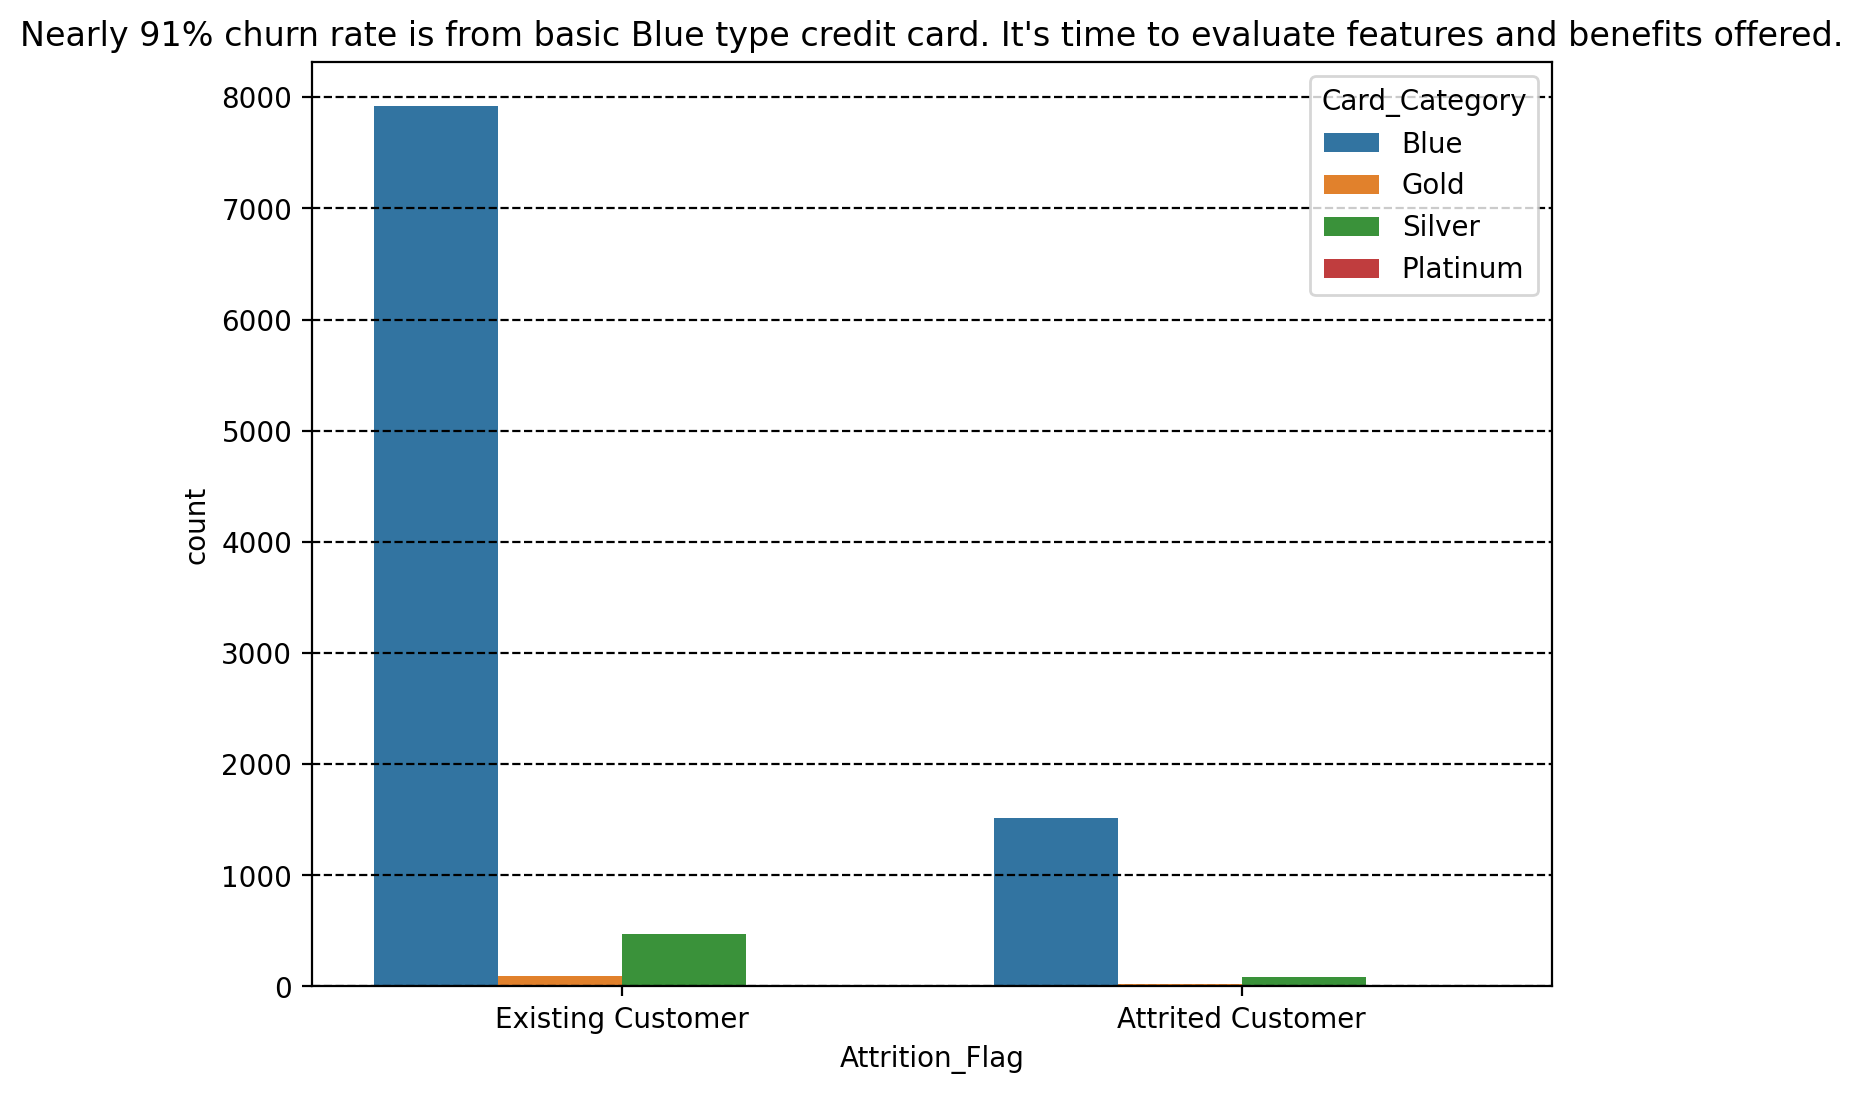

In [64]:
plt.figure(figsize=(8,6),dpi=200)
plt.grid(axis='both',linestyle='--',color='k')
sns.countplot(data=df_cc, x='Attrition_Flag', hue='Card_Category')
plt.title('Nearly 91% churn rate is from basic Blue type credit card. It\'s time to evaluate features and benefits offered.')

In [67]:
df_cc['Age_Group'].value_counts()

Age_Group
40s             4561
50s             2998
30s             1841
60 and Above     532
20s              195
Name: count, dtype: int64

Text(0.5, 1.0, 'Majority of basic blue card hold by 40 and 50s age group and Silver type by 40s')

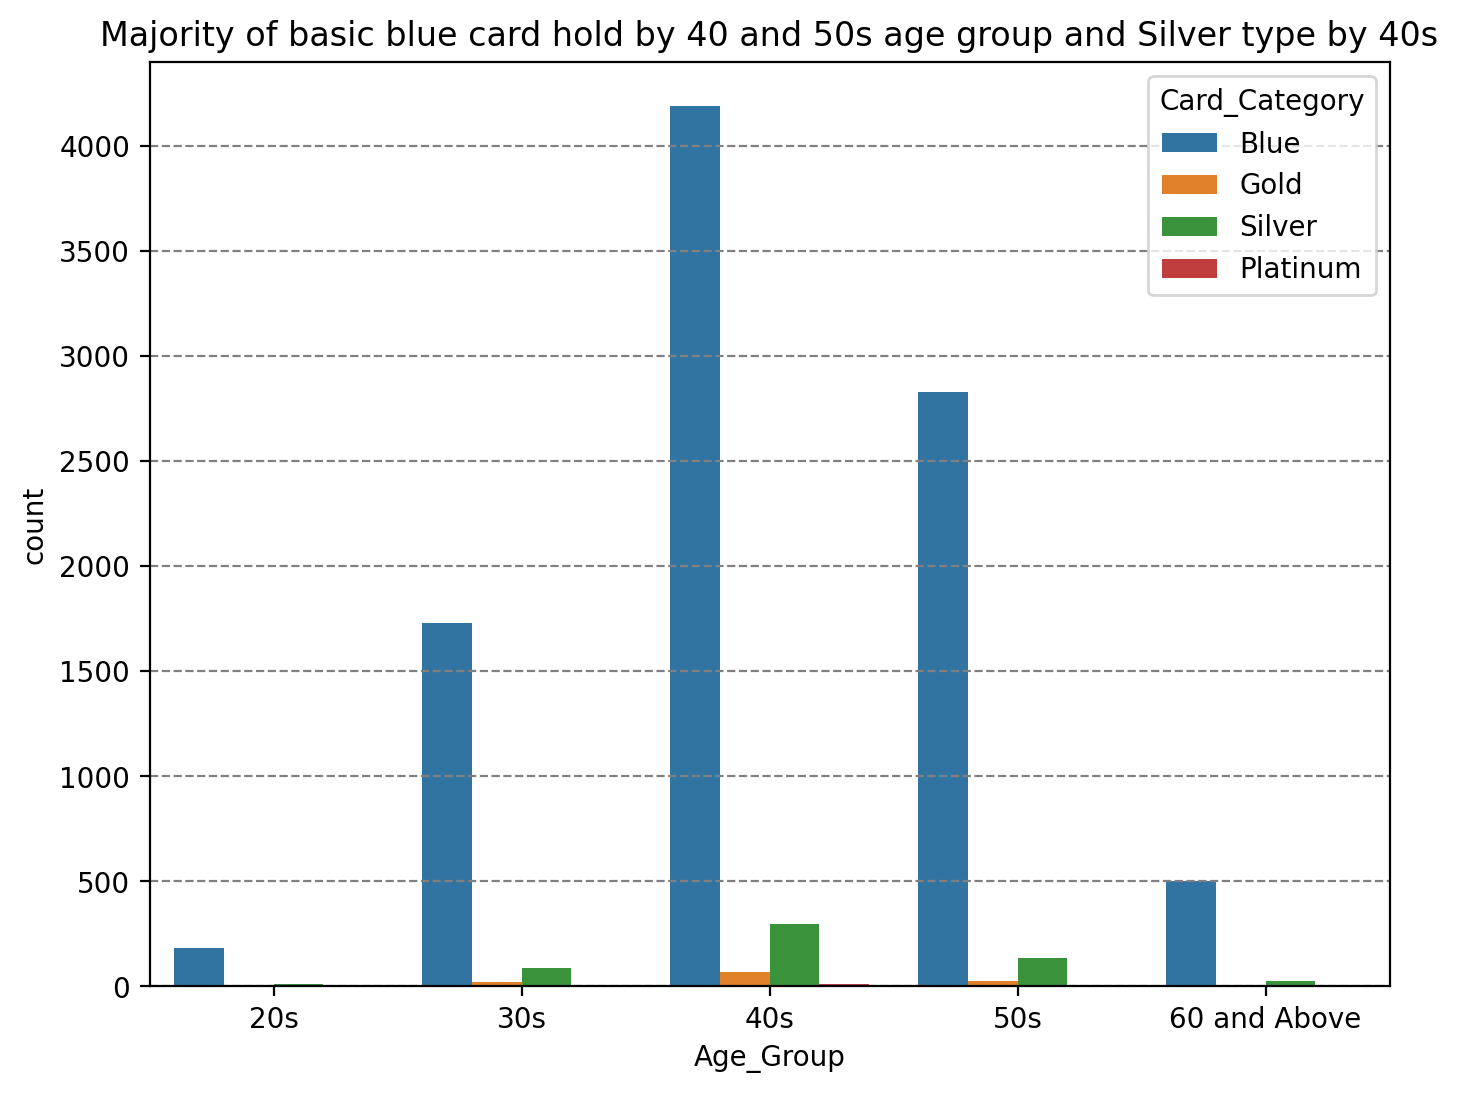

In [68]:
age_order = ['20s','30s','40s','50s','60 and Above']
plt.figure(figsize=(8,6),dpi=200)
plt.grid(axis='y', linestyle='--', color='gray')
sns.countplot(data=df_cc, x='Age_Group', hue='Card_Category', order=age_order)
plt.title('Majority of basic blue card hold by 40 and 50s age group and Silver type by 40s')

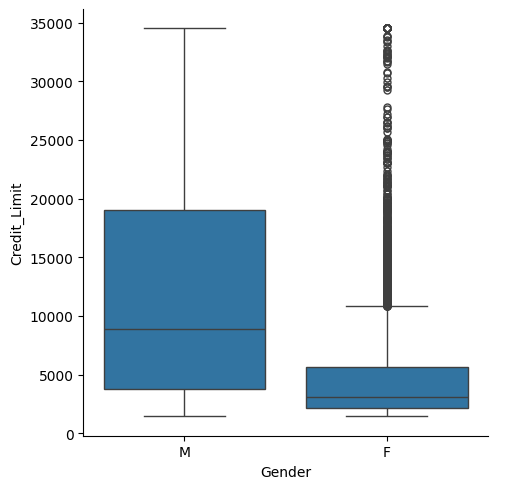

In [69]:
sns.catplot(data=df_cc, x='Gender', y='Credit_Limit', kind='box')
#Credit limit available to Female is highly skewed and spread

### #4 Impact of Customer Tenure

In [80]:
df_cc.groupby('MOB_Group')['Churn_Target'].mean()

MOB_Group
1-2 yr     0.148760
2-3 yr     0.160760
3-4 yr     0.161833
GT 4 yr    0.169466
Name: Churn_Target, dtype: float64

<Axes: xlabel='MOB_Group', ylabel='Count'>

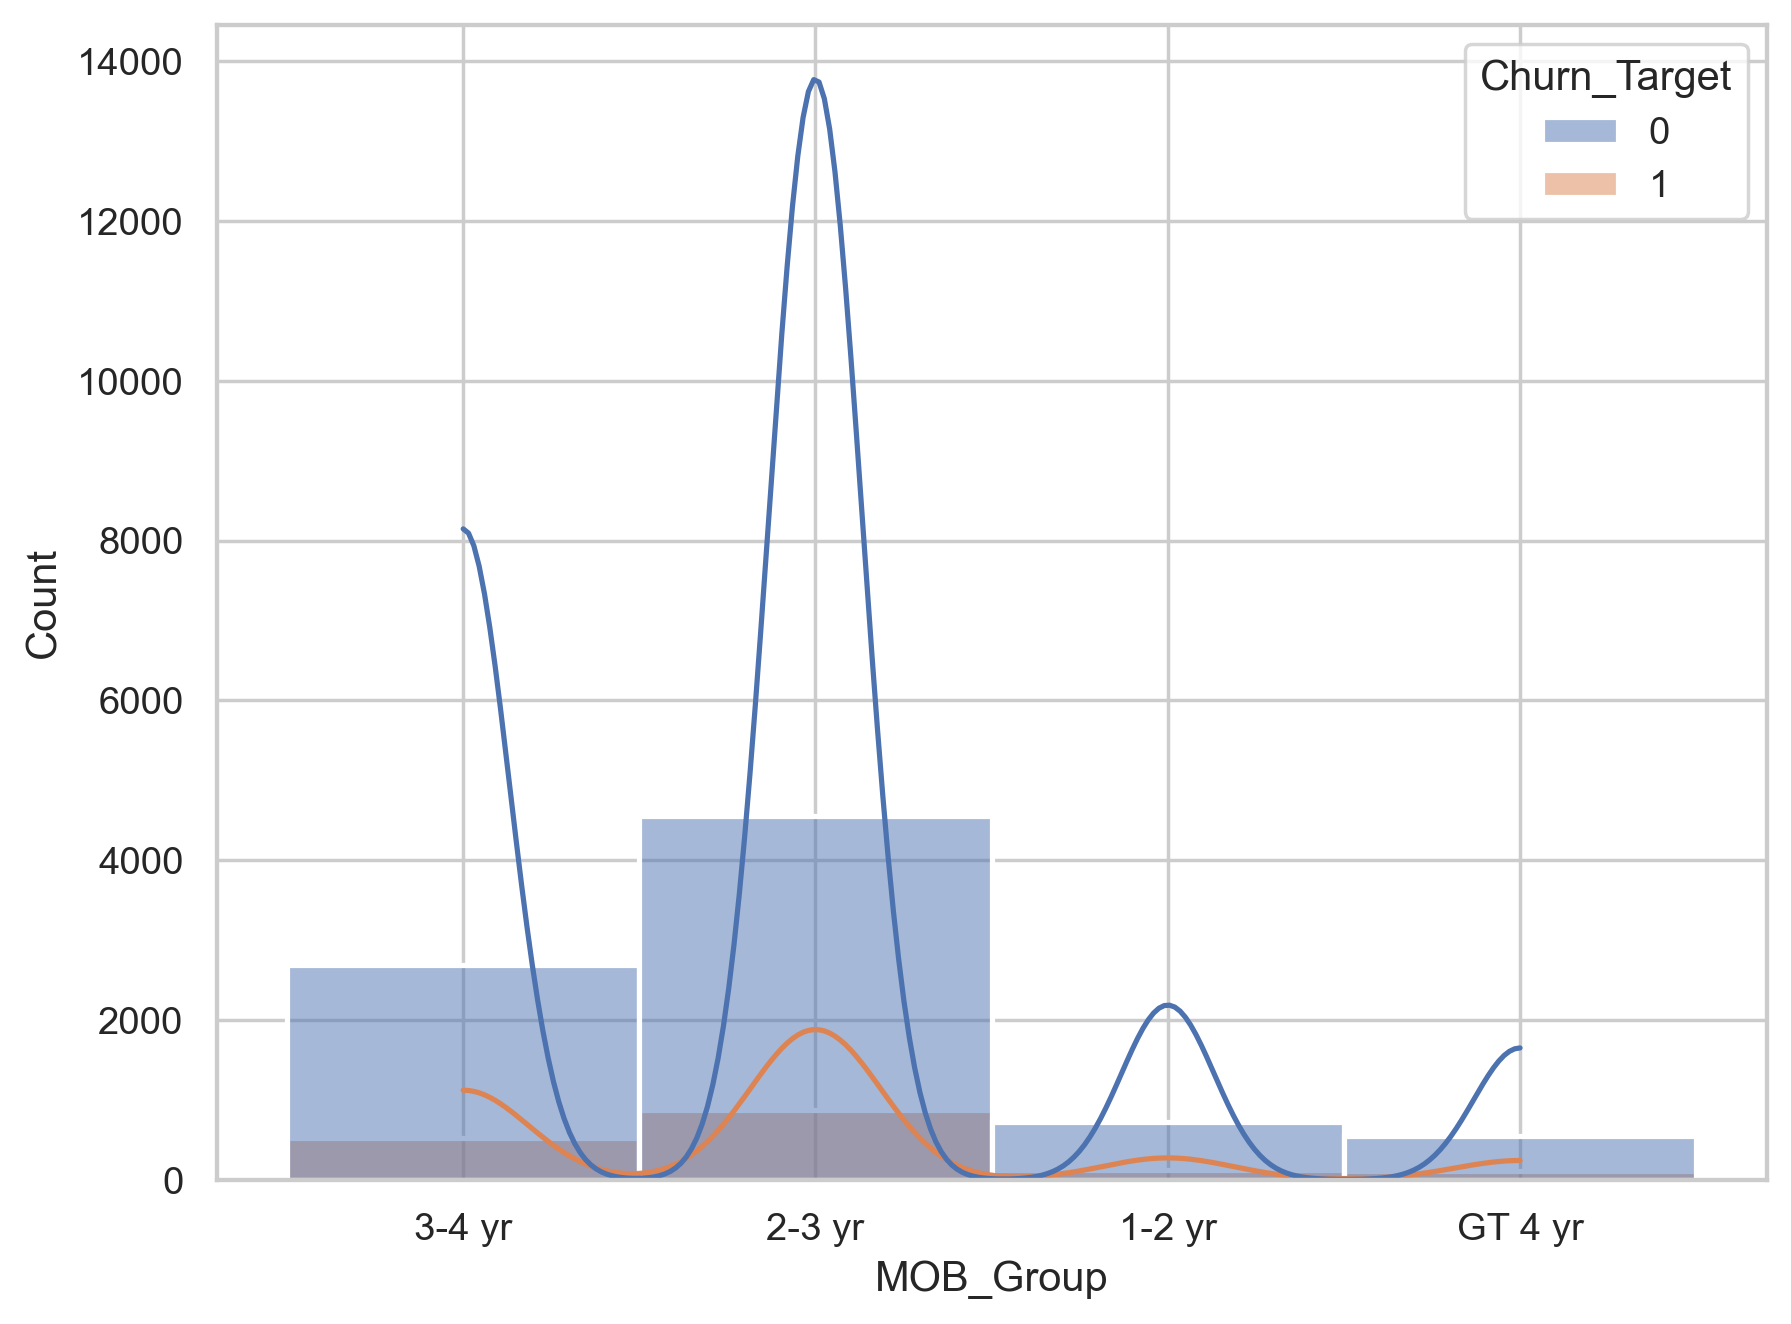

In [77]:
plt.figure(figsize=(8,6), dpi=250)
sns.set(style='whitegrid')
sns.histplot(data=df_cc, x='MOB_Group', hue='Churn_Target',kde=True, color='cyan', linewidth=1.5)
#About 36% customers churn after more than 2 yrs of loyalty. Need to look for dissatifications and preferences.

Text(0.5, 1.0, 'Linear positive correlation till 3 relationship(SB,FD,Loan) and Tenure then const')

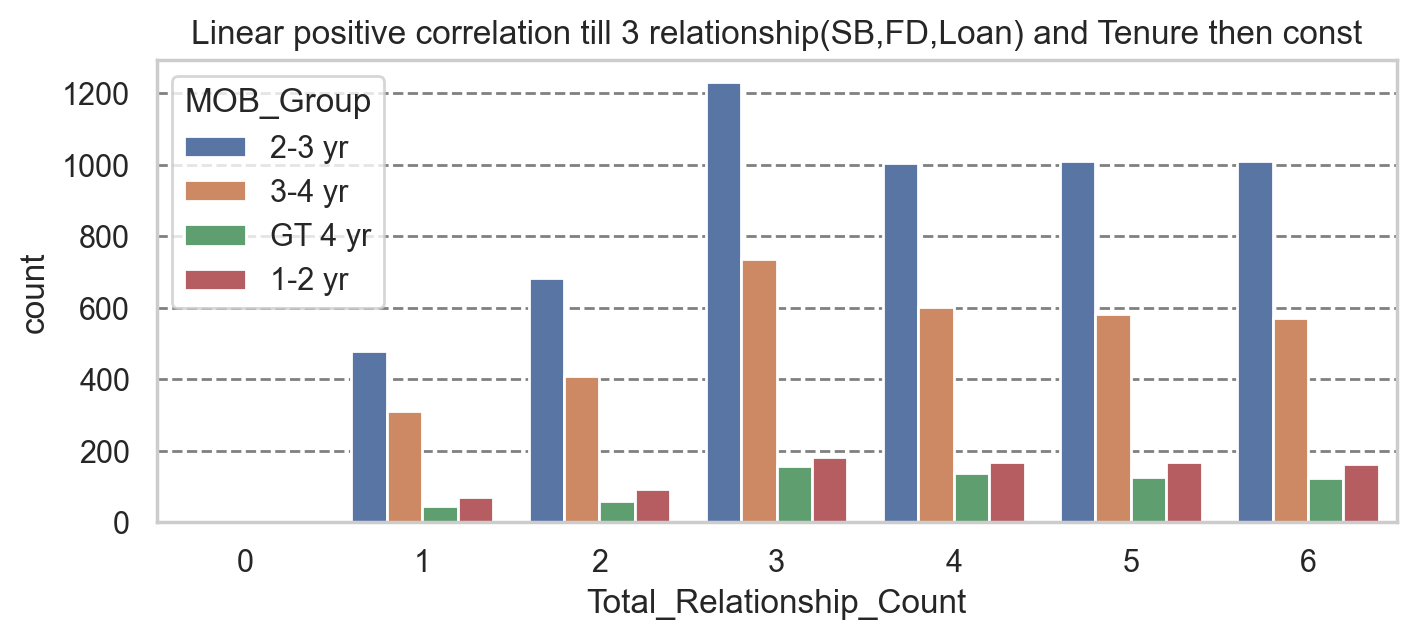

In [90]:
#Relationship
relationship_order = ['0','1','2','3','4','5','6']
plt.figure(figsize=(8,3),dpi=200)
plt.grid(axis='y', linestyle='--', color='gray')
sns.countplot(data=df_cc, hue='MOB_Group', x='Total_Relationship_Count', order=relationship_order)
plt.title('Linear positive correlation till 3 relationship(SB,FD,Loan) and Tenure then const')

### #5 Card Usage impact

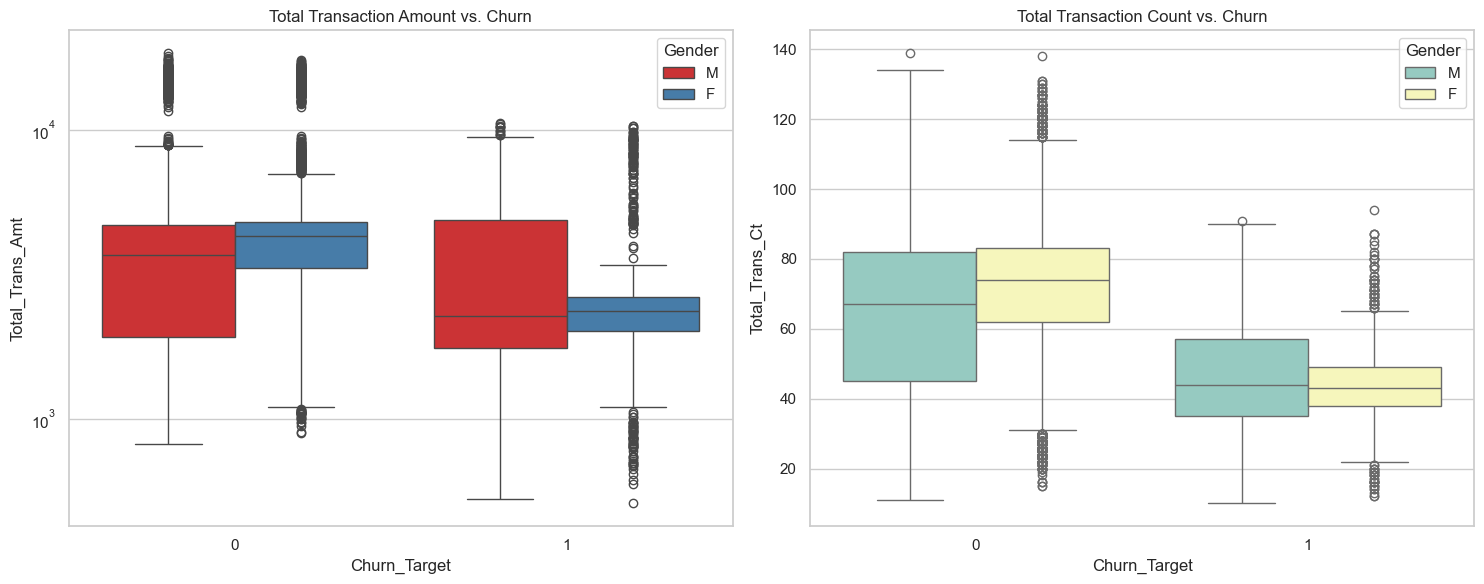

In [96]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(ax=axes[0], data=df_cc, x='Churn_Target', y='Total_Trans_Amt',hue='Gender', palette='Set1')
axes[0].set_title('Total Transaction Amount vs. Churn')
axes[0].set_yscale('log') #Log scale if distribution is highly skewed

sns.boxplot(ax=axes[1], data=df_cc, x='Churn_Target', y='Total_Trans_Ct', hue='Gender', palette='Set3')
axes[1].set_title('Total Transaction Count vs. Churn')
plt.tight_layout()
#There are high outliers for count and amt in churned female customer and median txn count is lower in churned segment

### #6. Credit Limit and Utilization Ratio

In [97]:
df_cc.groupby('Churn_Target')[['Credit_Limit', 'Avg_Utilization_Ratio']].median()

,Credit_Limit,Avg_Utilization_Ratio
Churn_Target,,
0,4643.5,0.211
1,4178.0,0.000


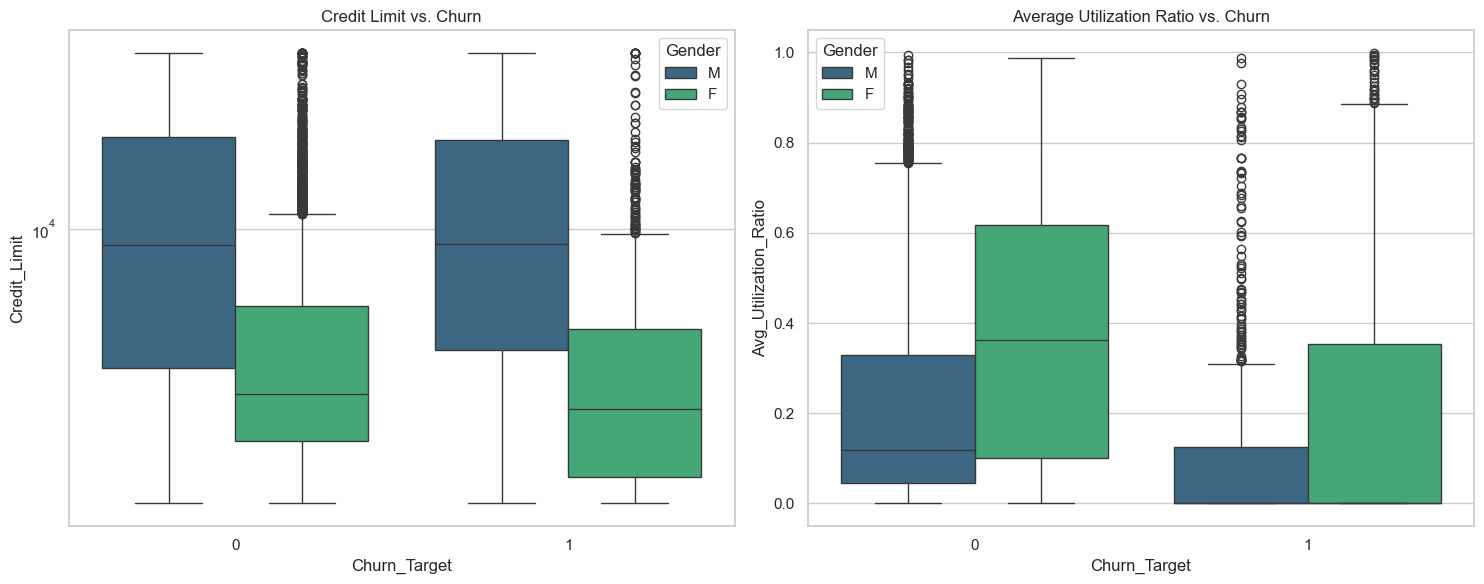

In [102]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(ax=axes[0], data=df_cc, x='Churn_Target', y='Credit_Limit',hue='Gender', palette='viridis')
axes[0].set_title('Credit Limit vs. Churn')
axes[0].set_yscale('log') # Use log scale if distribution is highly skewed

sns.boxplot(ax=axes[1], data=df_cc, x='Churn_Target', y='Avg_Utilization_Ratio',hue='Gender', palette='viridis')
axes[1].set_title('Average Utilization Ratio vs. Churn')
plt.tight_layout()
#Credit limit might not play vital role, however customers stop using cards before attrition across gender. Might be the features are not benefical

### #7 Customer Engagement and Interaction

In [104]:
df_cc.groupby('Churn_Target')[['Months_Inactive_12_mon', 'Contacts_Count_12_mon']].median()

,Months_Inactive_12_mon,Contacts_Count_12_mon
Churn_Target,,
0,2.0,2.0
1,3.0,3.0


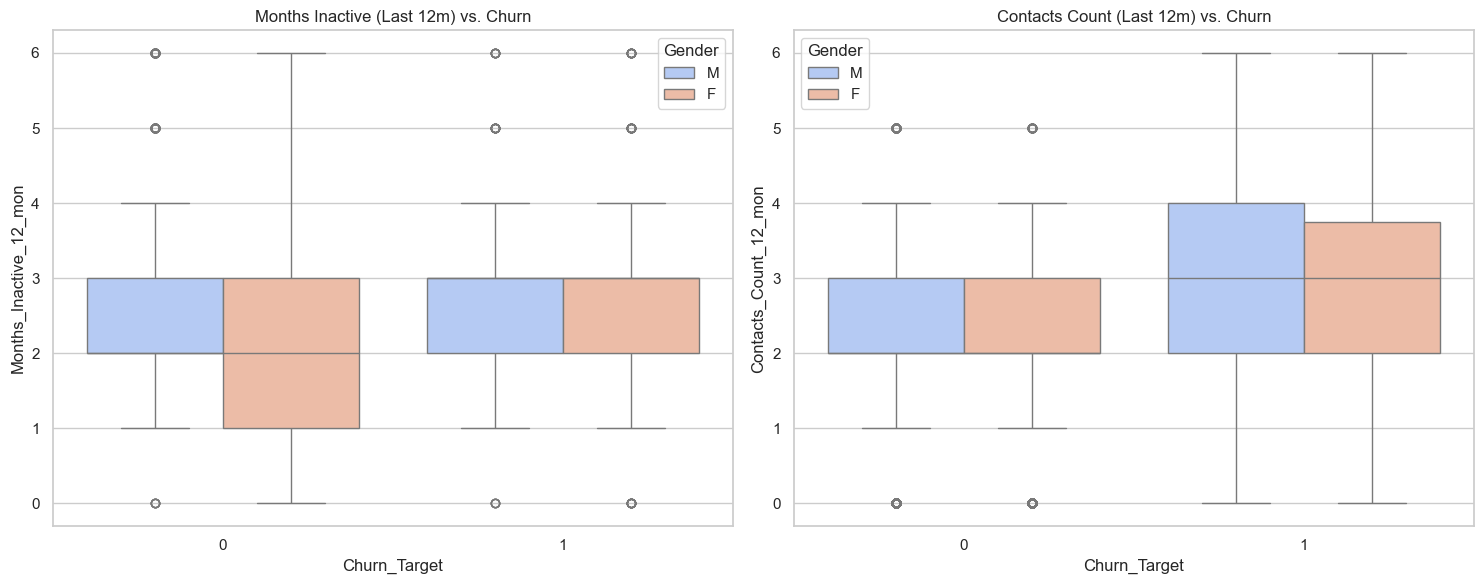

In [105]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(ax=axes[0], data=df_cc, x='Churn_Target', y='Months_Inactive_12_mon', hue='Gender',palette='coolwarm')
axes[0].set_title('Months Inactive (Last 12m) vs. Churn')

sns.boxplot(ax=axes[1], data=df_cc, x='Churn_Target', y='Contacts_Count_12_mon', hue='Gender',palette='coolwarm')
axes[1].set_title('Contacts Count (Last 12m) vs. Churn')
plt.tight_layout()
#Card remain inactive for more than 3M before closing and retention strategies are required. They are contacted several times in 12M.

### #8 Change in Txn behaviour over Quarters

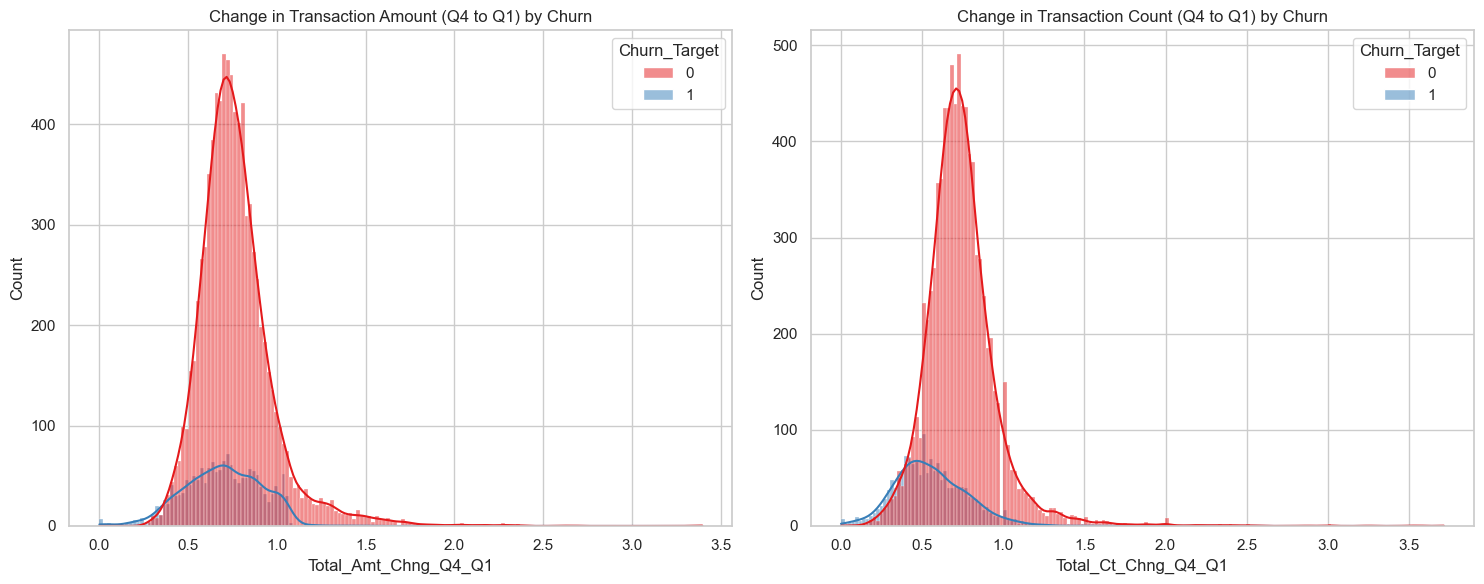

In [112]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.histplot(ax=axes[0], data=df_cc, x='Total_Amt_Chng_Q4_Q1', hue='Churn_Target', kde=True, palette='Set1')
axes[0].set_title('Change in Transaction Amount (Q4 to Q1) by Churn')

sns.histplot(ax=axes[1], data=df_cc, x='Total_Ct_Chng_Q4_Q1', hue='Churn_Target', kde=True, palette='Set1')
axes[1].set_title('Change in Transaction Count (Q4 to Q1) by Churn')
plt.tight_layout()

**Significant decrease in churned customer's transaction amount(50% to 80% only of prev quarter) and count(40% of prev quarter) from Q4 to Q1 next year is strongly associated with churn. Need to monitor these changes proactively and trigger alerts for customers showing sharp declines to initiate retention efforts.**

### #9 Relationship with Revolving credit balance

Text(0.5, 1.0, 'Total Revolving Balance vs. Churn')

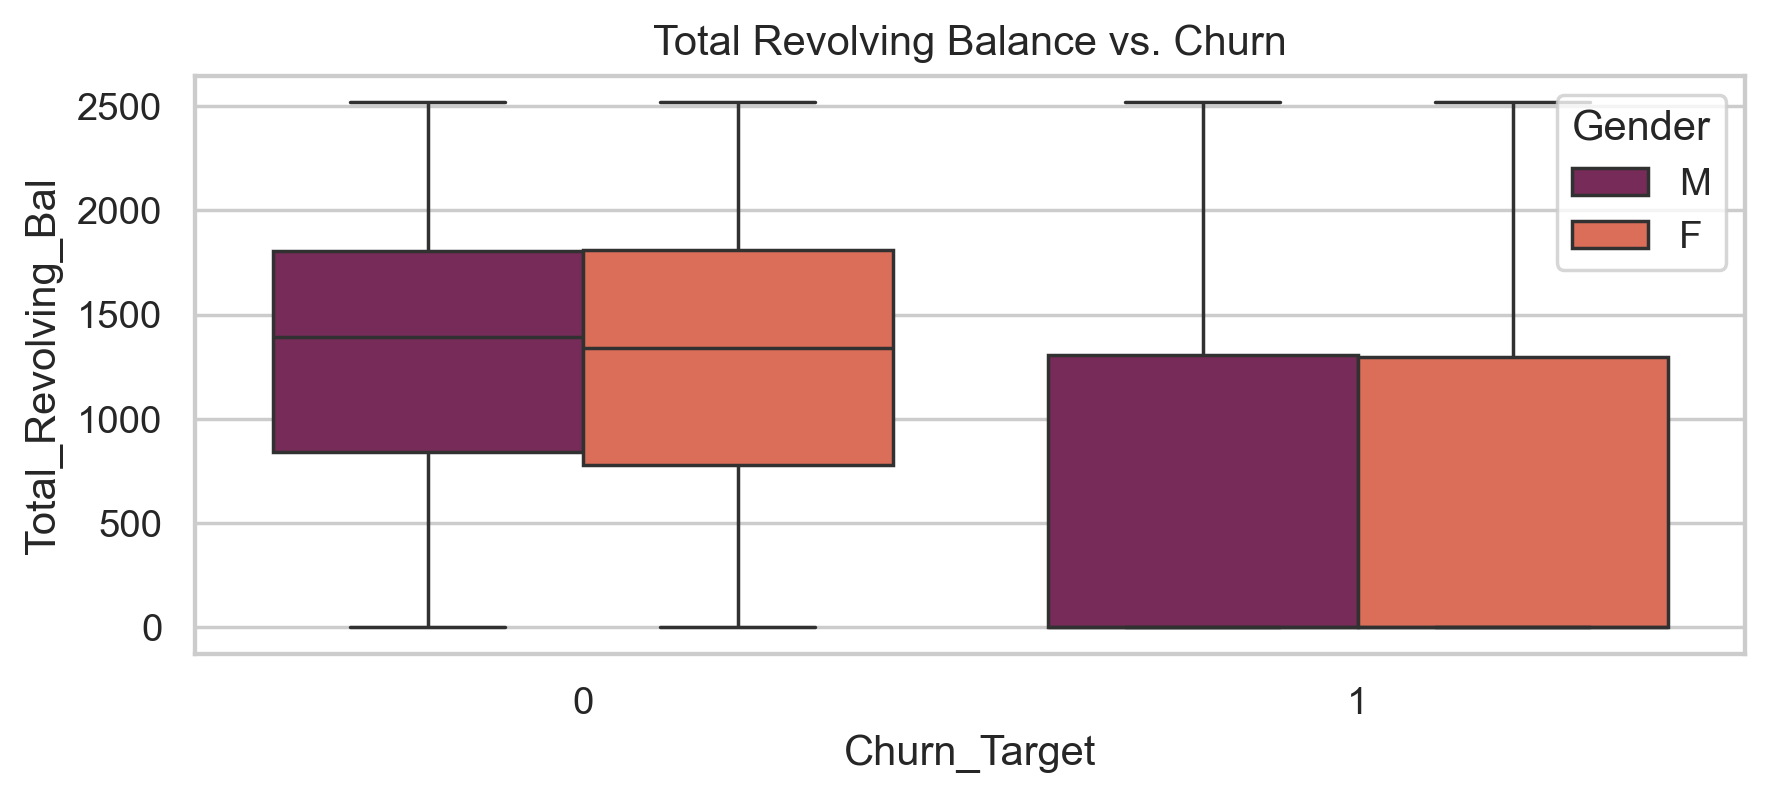

In [117]:
plt.figure(figsize=(8, 3), dpi=250)
sns.boxplot(data=df_cc, x='Churn_Target', y='Total_Revolving_Bal', hue='Gender', palette='rocket')
plt.title('Total Revolving Balance vs. Churn')
#Credit card revolving/outstanding balances drops to low levels to 50% churning customers clear off dues. They might not leveraging credit and engagement

### #10 Bank relationships/products vs churn rate

C:\Users\anshu\AppData\Local\Temp\ipykernel_23968\3440908660.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Relationship_Count', y='Churn_Target',data=churn_by_products, palette='Set2')


Text(0.5, 0, 'Number of Products Held with Bank')

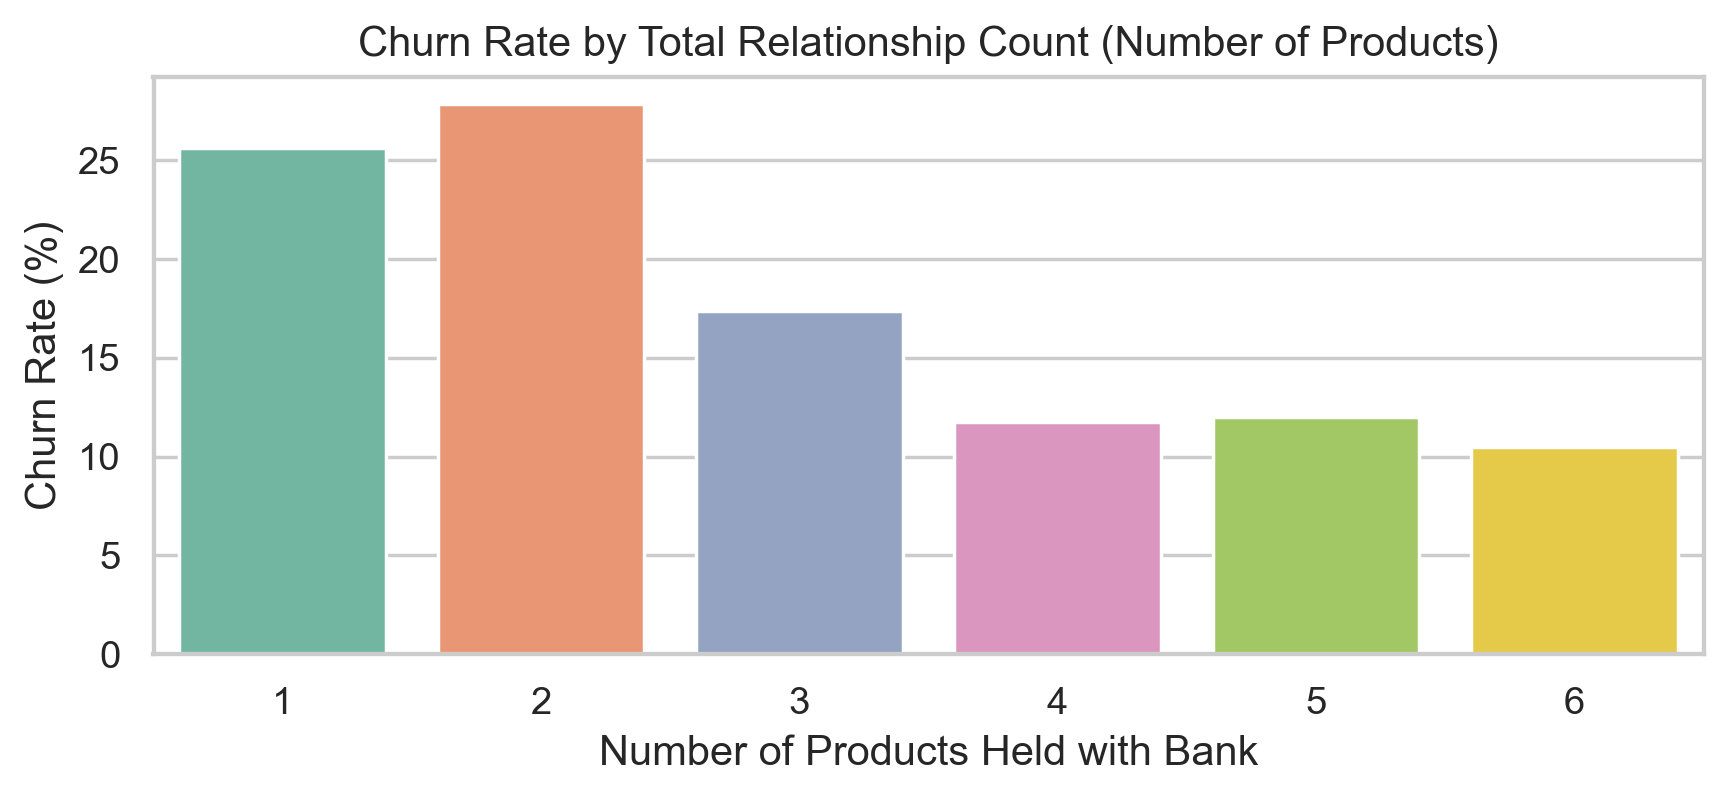

In [131]:
#Do customers with fewer products with the bank churn more from their credit card?
churn_by_products = df_cc.groupby('Total_Relationship_Count')['Churn_Target'].mean()*100
churn_by_products=churn_by_products.reset_index() #Convert to DataFrame

plt.figure(figsize=(8,3),dpi=250, edgecolor='k')
sns.barplot(x='Total_Relationship_Count', y='Churn_Target',data=churn_by_products, palette='Set2')
plt.title('Churn Rate by Total Relationship Count (Number of Products)')
plt.ylabel('Churn Rate (%)')
plt.xlabel('Number of Products Held with Bank')

**Customers with fewer relationship held, like 1 or 2 tend to have high credit card attrition. We should look to cross sell other bank products to deepen customer relationship and increase stickiness.**

*Thank You!*